<a href="https://colab.research.google.com/github/ramrajv/Ramraj_Prayag/blob/main/Ramraj_Vasudevan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LENDING CLUB CASE STUDY


---
                                         By Ramraj Vasudevan and Prayag Sanjay



# Problem Statement
1.	A consumer finance company that specialises in lending various types of loans to urban customers must decide for loan approval based on the applicant’s profile. Two types of risks are associated: -
    
    1.1.	Loss of business if applicant likely to repay loan.
    
    1.2.	Loss of finance if applicant NOT likely to repay loan.

# Data Set
2.	Past loan applicants’ data and whether they ‘defaulted’ or not.

# Aim
3.	To identify patterns which indicate if a person is likely to default.

# Concept and Approach

## Concept
1. Loan Stages.  Our concept of determining loan default will flow from the stages of loan. The loan decision stage is an important stage. The loan company considers all background information including customer and verification information to arrive at the most important factor.

2. Key Factors in Stages - In our case study, we determine that this factor is the *installment* amount. This amount incorporates all necessary information pertaining to the customer’s information and determines of her/ his capability to repay the loan and therefore arrive at the amount to be funded. However, installment amount needs to be matched with income debt to arrive at an indicator for loan capacity.

## Approach

### EDA
Based on the available data, as part of EDA, the first step is to clean, correct missing values and data manipulation. We will analyse data using univariate, bivariate and multi variate analyses. Metrics will be derived for business, type and data driven approaches. Finally, we will check the effect of these metrics and analyses to determine whether or not a loan would default.

In [439]:
# numpy and pandas for data manipulation

import numpy as np
import pandas as pd 

# Suppress warnings 

import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn with their settings for plotting

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
%matplotlib inline

# set pandas configuration to show all column data

pd.set_option('display.max_columns', None)

#### Read the data

In [440]:
# Now we will load the data and get a feel of it
# low_memory = true as one of the column had mixed type of data

df = pd.read_csv('loan.csv', low_memory=False)

#### Clean and treat for Null Values

In [441]:
# Drop columns with null values

df = df.dropna(how = 'all',axis = 1)

In [442]:
# Check if duplicates

df[df.duplicated()==True]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

In [443]:
df.shape

(39717, 57)

In [444]:
# Check number of unique values in fields

df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [445]:
# Drop columns with single unique value.

nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)

In [446]:
# Drop rows with all null values

df = df.dropna(how = 'all')

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [448]:
# Get null percentages for all columns

(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False)

next_pymnt_d               97.129693
mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
desc                       32.580507
emp_title                   6.191303
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
funded_amnt_inv             0.000000
verification_status         0.000000
member_id                   0.000000
url                         0.000000
loan_status                 0.000000
issue_d                     0.000000
loan_amnt                   0.000000
annual_inc                  0.000000
term                        0.000000
home_ownership              0.000000
funded_amnt                 0.000000
sub_grade                   0.000000
grade                       0.000000
installment                 0.000000
int_rate                    0.000000
purpose                     0.000000
d

In [449]:
# Drop columns with high null values (more than 50%)

df = df.drop(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_delinq'], axis = 1)

In [450]:
# Check following columns with null values

# desc                       32.580507
# emp_title                   6.191303
# emp_length                  2.706650
# pub_rec_bankruptcies        1.754916
# last_pymnt_d                0.178765
# revol_util                  0.125891
# title                       0.027696
# last_credit_pull_d          0.005036

df['desc'].describe()

count     26777
unique    26527
top            
freq        210
Name: desc, dtype: object

In [451]:
# Check data in description

df['desc'].sample(5)

35187     This is for a 1.03 Ct Diamond ring, Ex Cut,po...
26060                                                  NaN
33368      591333 added on 12/15/09 > My income is deri...
17589      Borrower added on 03/26/11 > I have been try...
4840       Borrower added on 10/18/11 > The loan will b...
Name: desc, dtype: object

In [452]:
# Dropping description field since no meaningful information

df = df.drop('desc', axis=1)

In [453]:
# Check employee title

df['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [454]:
# Employee title has a high range of unique values with no single field of
# sizeable frequency. 

# Dropping this field

df = df.drop('emp_title', axis = 1)

In [455]:
# Check employee length

df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [456]:
# Treat nan values

df.loc[df['emp_length'].isnull(), 'emp_length'] = '10+ years'

# Check employee length

df['emp_length'].isnull().sum()

0

Trated null values for employee length

In [457]:
# Check public records bankruptcies for null values

df['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [458]:
# Treat for null values

df.loc[df['pub_rec_bankruptcies'].isna(), 'pub_rec_bankruptcies'] = 0
df['pub_rec_bankruptcies'].isna().sum()

0

Treated public records bankruptcies for null values

In [459]:
# check and treat last payment date for null values

df['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [460]:
# Treat for null values with mode

df.loc[df['last_pymnt_d'].isnull(), 'last_pymnt_d'] = 'May-16'
df['last_pymnt_d'].isnull().sum()

0

Treated last payment date for null values

In [461]:
# Check and treat revolving utility rate for null values

df['revol_util'].describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [462]:
# Convert to type float

df.loc[:,'revol_util'] = df['revol_util'].str.strip('%').astype(float)

In [463]:
df['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [464]:
df.loc[df['revol_util'].isna(), 'revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
df['revol_util'].isnull().sum()

0

Treated revolving utility rate for null values

In [465]:
# Check and treat title for null values

df['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [466]:
# Since there are a very high number of unique values in string field, it will
# be dropped.

df = df.drop('title', axis = 1)

In [467]:
# Check and treat last credit pull date

df['last_credit_pull_d'].describe()

count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object

In [468]:
df.loc[df['last_credit_pull_d'].isnull(), 'last_credit_pull_d'] = 'May-16'
df['last_credit_pull_d'].isnull().sum()

0

In [469]:
# Examine columns of Object type

d_types = df.dtypes
d_types[d_types=='O']

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
url                    object
purpose                object
zip_code               object
addr_state             object
earliest_cr_line       object
last_pymnt_d           object
last_credit_pull_d     object
dtype: object

In [470]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [471]:
# Clean 'term' column

df.loc[df['term']==' 36 months','term'] = 36
df.loc[df['term']==' 60 months','term'] = 60
df['term'] = df['term'].astype(int)

In [472]:
df['term'].unique()

array([36, 60])

In [473]:
# Check Interest Rate

df['int_rate'].sample()

32625    10.25%
Name: int_rate, dtype: object

In [474]:
# Convert interest rate from object to float

df.loc[~df['int_rate'].isna(),'int_rate'] = df['int_rate'].str.strip('%').astype(float)

In [475]:
df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [476]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [477]:
# Create grade order for future use

g_ord = ['A','B','C','D','E','F','G']

In [478]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [479]:
# Dropping sub grade since subset of grade.

df = df.drop('sub_grade',axis = 1)

In [480]:
# Checking employee length

df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [481]:
# Create employee length order for future use

e_ord = ['< 1 year', '1 year', '2 years', '3 years','4 years', '5 years',  '6 years', '7 years', \
         '8 years', '9 years', '10+ years']

In [482]:
# Checking home ownership

df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [483]:
# Check Verification Status

df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

Datelike values including issue date, last payment date, earliest credit line and last credit pull date will be checked together later in the notebook

In [484]:
# Checking loan status

df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In the dataset, the *loan status* is the *key indicator*. It indicates whether the loan has defaulted, currently running or fully paid. To categorise loan, we need to look at those cases that have either defaulted or fully paid. So, current loans can be disregarded. We will delete all rows with loan status as ‘Current’.

In [485]:
# Removing all rows with loan status as current

df = df[df['loan_status']!='Current']

In [486]:
# Checking url

df['url'].describe()

count                                                 38577
unique                                                38577
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

In [487]:
# Drop url since these field contain no relevant information

df = df.drop('url', axis = 1)

In [488]:
# Checking purpose column

df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [489]:
# Checking Zip code and Addr state

df['zip_code'].sample(5), df['addr_state'].sample(5)

(31226    190xx
 1136     606xx
 28734    201xx
 26229    112xx
 31949    926xx
 Name: zip_code, dtype: object, 7793     FL
 37809    MO
 7548     NY
 20800    NY
 25274    PA
 Name: addr_state, dtype: object)

In [490]:
# Check for variance of zip codes per state

np.var(df['zip_code'].count()), np.var(df['addr_state'].count())

(0.0, 0.0)

In [491]:
# Since zip code and address state show no variance, we can drop these columns

df = df.drop(['addr_state','zip_code'], axis = 1)

In [492]:
# Converting datetime like objects to pandas datetime type.

df.loc[~df['last_credit_pull_d'].isna(),'last_credit_pull_d'] = pd.to_datetime('01-' + df['last_credit_pull_d'])
df.loc[~df['last_pymnt_d'].isna(),'last_pymnt_d'] = pd.to_datetime('01-' + df['last_pymnt_d'])
df.loc[~df['issue_d'].isna(),'issue_d'] = pd.to_datetime('01-' + df['issue_d'])
df.loc[~df['earliest_cr_line'].isna(),'earliest_cr_line'] = pd.to_datetime('01-' + df['earliest_cr_line'])
df[['last_credit_pull_d','last_pymnt_d', 'issue_d', 'earliest_cr_line']].sample(5)

last_credit_pull_d last_pymnt_d    issue_d earliest_cr_line
7349          2014-08-01   2014-01-01 2011-09-01       1990-12-01
12141         2014-02-01   2013-09-01 2011-07-01       1985-05-01
39584         2016-05-01   2008-10-01 2007-11-01       1990-06-01
20545         2016-05-01   2011-08-01 2011-01-01       1971-01-01
4899          2013-12-01   2013-05-01 2011-10-01       2002-06-01

In [493]:
# Check year of earliest credit line

np.sort(df['earliest_cr_line'].dt.year.unique())

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056, 2059, 2061,
       2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070])

In [494]:
# Since the year value is greater than current year, and the computers have a datum date as 01 Jan 1970, all year values
# greater than current year have been subtracted by 100 to get the correct date.

df.loc[df['earliest_cr_line'].dt.year>=2009,'earliest_cr_line'] = df['earliest_cr_line'] - pd.offsets.DateOffset(years = 100)
df['earliest_cr_line'].dt.year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 1962, 1973, 1968, 1974, 1967, 1965,
       1963, 1954, 1966, 1964, 1959, 1956, 1946, 1950, 1961])

In [495]:
# Revolving utility rate and public recorded bankruptcies have been checked
# earlier.

In [496]:
# Checking other types of data

d_types[d_types!='O']

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
installment                float64
annual_inc                 float64
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
pub_rec_bankruptcies       float64
dtype: object

In [497]:
# Check for id and member id fields

np.var(df['id'].count()), np.var(df['member_id'].count())

(0.0, 0.0)

In [498]:
# Drop id and member id fields since these have zero variance

df = df.drop(['id','member_id'], axis = 1)

In [499]:
# Check loan, funded and funded investor amounts

df['loan_amnt'].describe(), df['funded_amnt'].describe(), df['funded_amnt_inv'].describe()

(count    38577.000000
 mean     11047.025430
 std       7348.441646
 min        500.000000
 25%       5300.000000
 50%       9600.000000
 75%      15000.000000
 max      35000.000000
 Name: loan_amnt, dtype: float64, count    38577.000000
 mean     10784.058506
 std       7090.306027
 min        500.000000
 25%       5200.000000
 50%       9550.000000
 75%      15000.000000
 max      35000.000000
 Name: funded_amnt, dtype: float64, count    38577.000000
 mean     10222.481123
 std       7022.720644
 min          0.000000
 25%       5000.000000
 50%       8733.440000
 75%      14000.000000
 max      35000.000000
 Name: funded_amnt_inv, dtype: float64)

In [500]:
# Dropping skewed fields

In [501]:
df.groupby('loan_status')['collection_recovery_fee'].mean()

loan_status
Charged Off    87.56594
Fully Paid      0.00000
Name: collection_recovery_fee, dtype: float64

The total payments is the sum total of total recovered principal, interest and late fee. Therefore, this amount can be checked against funded amount for different loan status.

In [502]:
df.loc[:,'rec_amnt'] = (df['total_rec_int'] + df['total_rec_late_fee'] + \
                       df['total_rec_prncp'])/df['funded_amnt']

In [503]:
df.loc[:,'pymnt_fndd_r'] = df['total_pymnt'] / df['funded_amnt']

In [504]:
df.groupby('loan_status')['pymnt_fndd_r'].describe()

count      mean       std       min       25%       50%  \
loan_status                                                              
Charged Off   5627.0  0.578188  0.329506  0.000000  0.302259  0.539135   
Fully Paid   32950.0  1.181248  0.106804  1.004573  1.109798  1.165908   

                  75%       max  
loan_status                      
Charged Off  0.835198  1.581723  
Fully Paid   1.226572  1.688852

In [505]:
df.groupby('loan_status')['rec_amnt'].describe()

count      mean       std       min       25%       50%  \
loan_status                                                              
Charged Off   5627.0  0.523743  0.320044  0.000000  0.258963  0.484669   
Fully Paid   32950.0  1.181248  0.106804  1.004573  1.109798  1.165909   

                  75%       max  
loan_status                      
Charged Off  0.768177  1.478441  
Fully Paid   1.226573  1.688852

In [506]:
df.loc[:,'total_pymnt_fndd_r'] = df['total_pymnt'] / df['funded_amnt']
df.groupby('loan_status')['total_pymnt_fndd_r'].describe()

count      mean       std       min       25%       50%  \
loan_status                                                              
Charged Off   5627.0  0.578188  0.329506  0.000000  0.302259  0.539135   
Fully Paid   32950.0  1.181248  0.106804  1.004573  1.109798  1.165908   

                  75%       max  
loan_status                      
Charged Off  0.835198  1.581723  
Fully Paid   1.226572  1.688852

The total payment and total recoveries of principal, interest and late fee show equivalence to funded amount in case of fully paid loan. In case of Charged Off loans, these are around 50% of the funded amount. Since these features are post loan closing, they are irrelevant in classifying a loan case.

Similarly, the total recoveries and collection_recovery_fee field has relevance only in case of defaulted loan cases.

Therefore, recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee and collection_recovery_fee along with relevant derived metrics may be dropped from the dataframe.

In [507]:
df = df.drop(['recoveries', 'total_pymnt', 'total_pymnt_inv', \
              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',\
              'collection_recovery_fee', 'rec_amnt','total_pymnt_fndd_r','pymnt_fndd_r'], axis = 1)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose         

In [509]:
# Check outstanding amounts

df.groupby('loan_status')[['out_prncp','out_prncp_inv']].describe()

out_prncp                                    out_prncp_inv       \
                count mean  std  min  25%  50%  75%  max         count mean   
loan_status                                                                   
Charged Off    5627.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        5627.0  0.0   
Fully Paid    32950.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       32950.0  0.0   

                                           
             std  min  25%  50%  75%  max  
loan_status                                
Charged Off  0.0  0.0  0.0  0.0  0.0  0.0  
Fully Paid   0.0  0.0  0.0  0.0  0.0  0.0

Since outstanding principal and outstanding principal investor have zero values across loan status, these can be dropped.

In [510]:
df = df.drop(['out_prncp','out_prncp_inv'], axis = 1)

In [511]:
# check if funded amount investor is greater than funded amount

df[(df['funded_amnt_inv']/ df['funded_amnt'])>1]

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

Based on above analysis, funded amount investor is a part of funded amount and therefore can be dropped.

In [512]:
df = df.drop('funded_amnt_inv', axis = 1)

In [513]:
df.shape

(38577, 26)

Post cleaning, we have arrived at 26 columns against 111 columns at the start of the process

### Univariate Analyses

#### Numerical Variables

In [514]:
# Check info of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   term                  38577 non-null  int64         
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   emp_length            38577 non-null  object        
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  dti             

In [515]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

HISTOGRAM PLOT OF ' LOAN_AMNT '


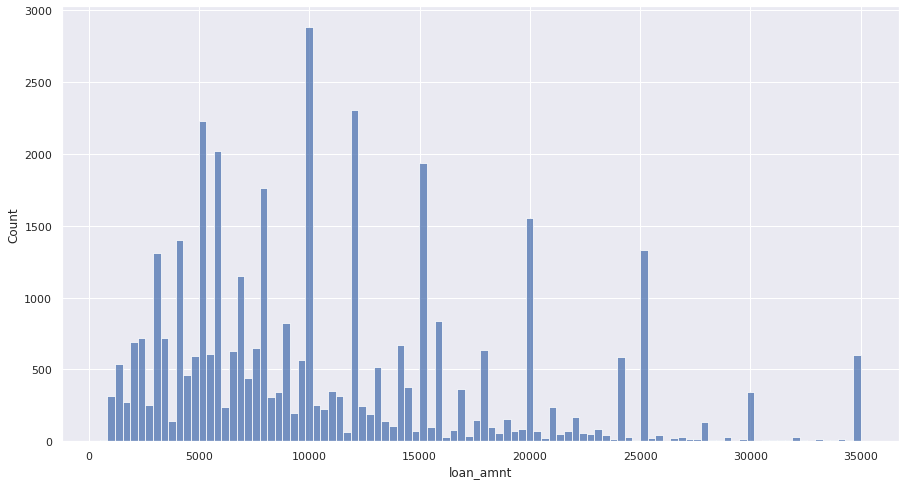

HISTOGRAM PLOT OF ' FUNDED_AMNT '


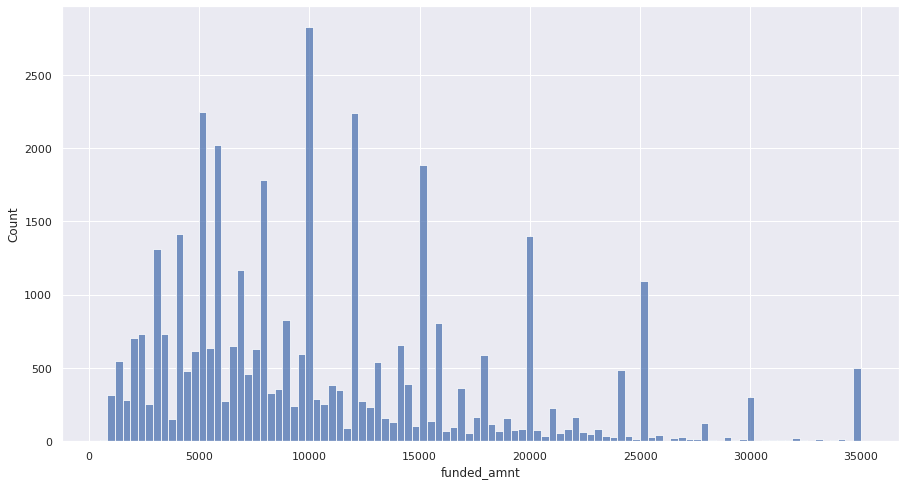

HISTOGRAM PLOT OF ' INT_RATE '


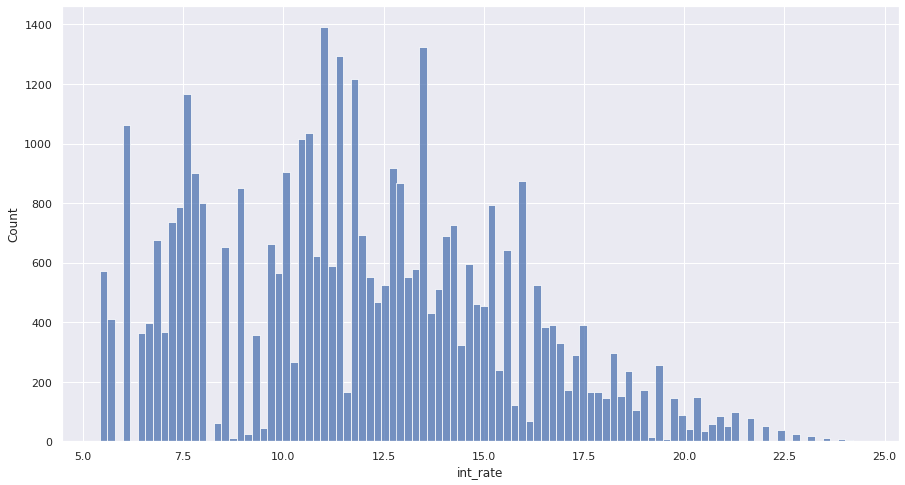

HISTOGRAM PLOT OF ' INSTALLMENT '


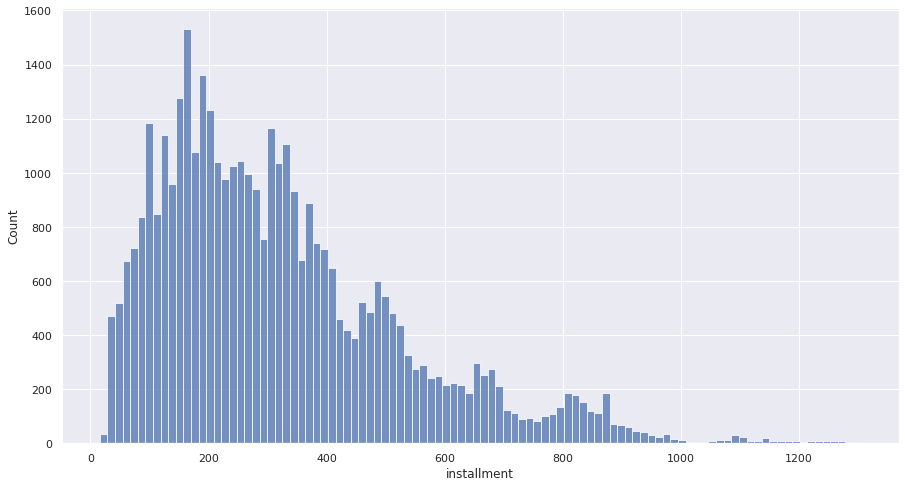

HISTOGRAM PLOT OF ' ANNUAL_INC '


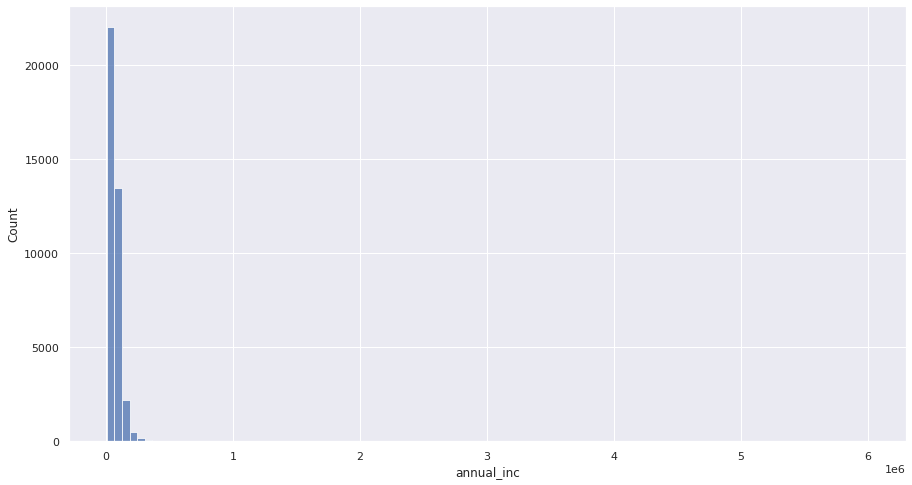

HISTOGRAM PLOT OF ' DTI '


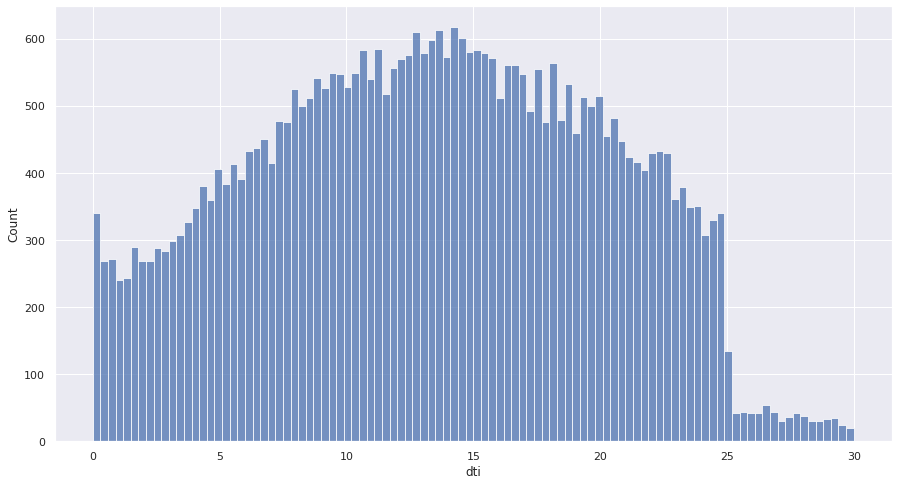

HISTOGRAM PLOT OF ' OPEN_ACC '


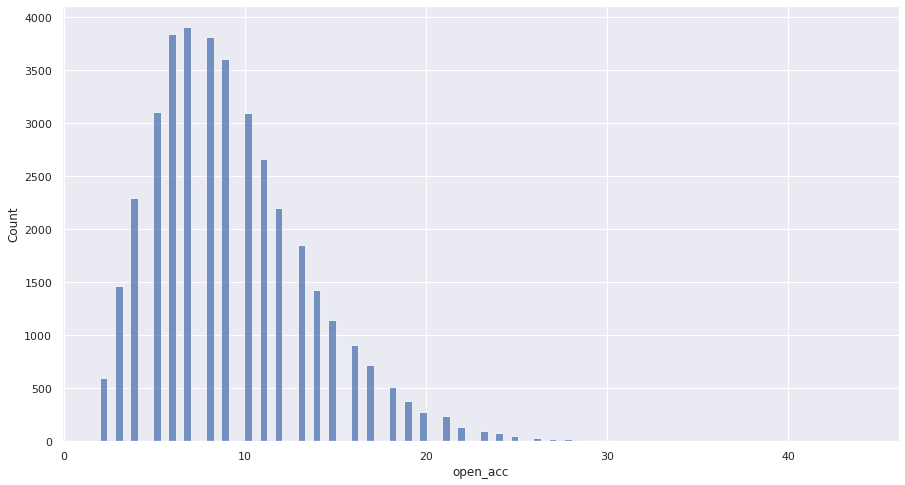

HISTOGRAM PLOT OF ' REVOL_BAL '


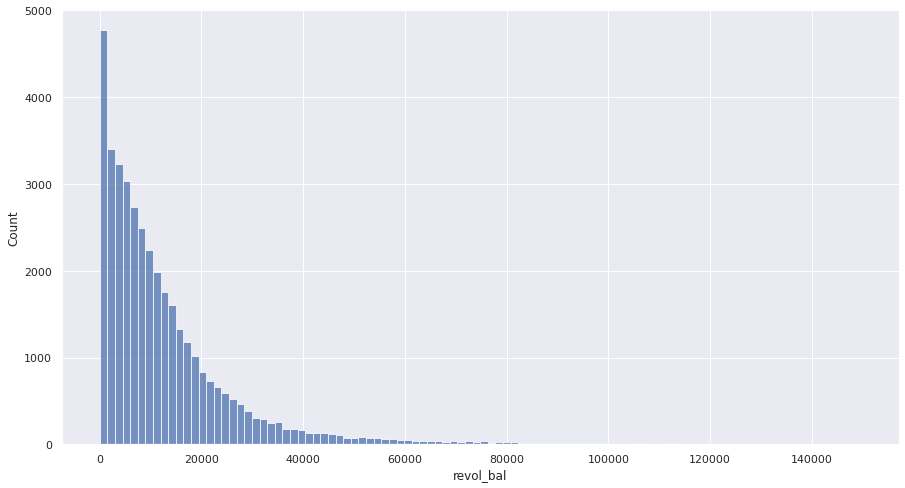

HISTOGRAM PLOT OF ' REVOL_UTIL '


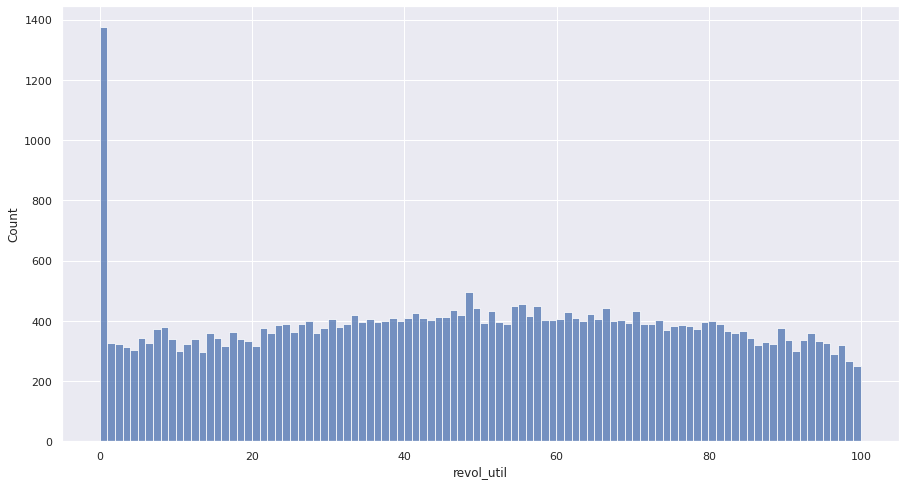

HISTOGRAM PLOT OF ' TOTAL_ACC '


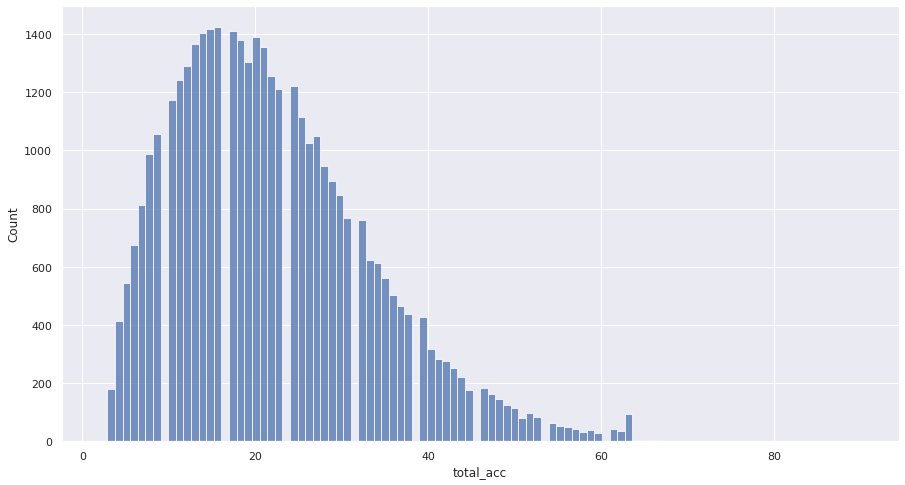

HISTOGRAM PLOT OF ' LAST_PYMNT_AMNT '


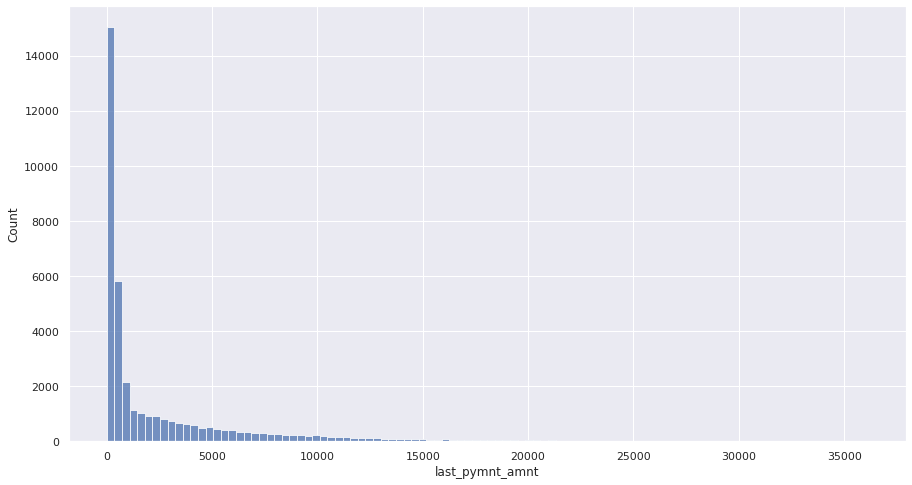

In [516]:
# Categorising columns into types of variables

num_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 
 'last_pymnt_amnt']
num_cat = ['term','delinq_2yrs','inq_last_6mths', 'pub_rec_bankruptcies', 'pub_rec']
cat_cols = ['grade','emp_length','home_ownership', 'verification_status', 'loan_status', 'purpose']
dt_cols = ['issue_d','earliest_cr_line', 'last_pymnt_d','last_credit_pull_d']

# Plot histograms for numerical variables

for col in df[num_cols]:
    print('HISTOGRAM PLOT OF',"'",col.upper(),"'")
    plt.figure(figsize=(15,8))
    sns.histplot(df[col], bins=100)
    plt.show()

##### Observations on Numerical Variables

1. *Right skewed data*: - loan amount, funded amount, interest rate, installment, open account, total account, last payment amount, annual income

2. *Left skewed* - recovery amount

3. *Evenly distributed*: -
    revolving utility rate, debt to income

#### Numerical Categories

HISTOGRAM PLOT OF ' TERM '


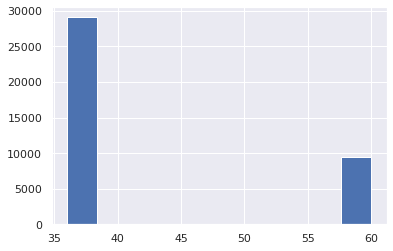

HISTOGRAM PLOT OF ' DELINQ_2YRS '


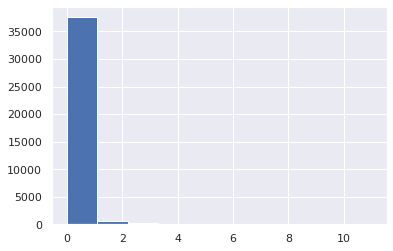

HISTOGRAM PLOT OF ' INQ_LAST_6MTHS '


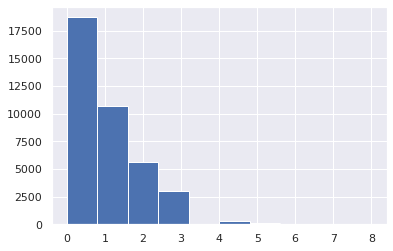

HISTOGRAM PLOT OF ' PUB_REC_BANKRUPTCIES '


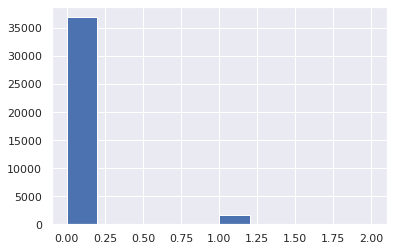

HISTOGRAM PLOT OF ' PUB_REC '


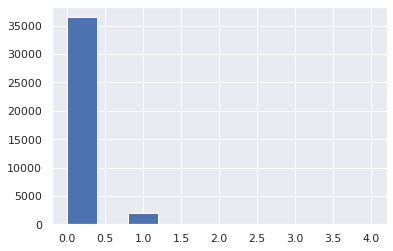

In [ ]:
for col in df[num_cat]:
    print('HISTOGRAM PLOT OF',"'",col.upper(),"'")
    plt.hist(df[col]) # Plot histogram
    plt.show()

##### Observations on Numerical Categories
1. *term* - number of loans with term 36months is greater than with 60months, 
2. *delinquencies last two years* - max count is less than 2, 
3. *inquiries in the last 6mths* has a median value of 0, 
4. *public recorded bankruptcies* - most cases are 0, 
5. *public records* - most cases are 0

#### Categorical Values

HISTOGRAM PLOT OF ' GRADE '


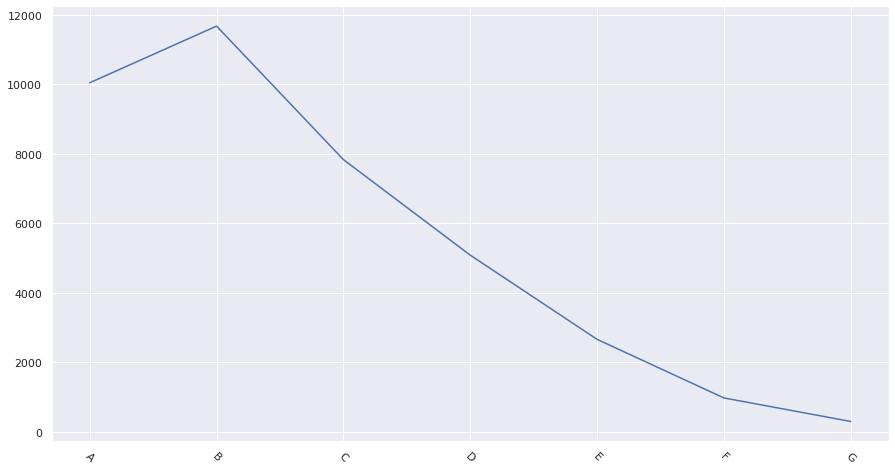

HISTOGRAM PLOT OF ' EMP_LENGTH '


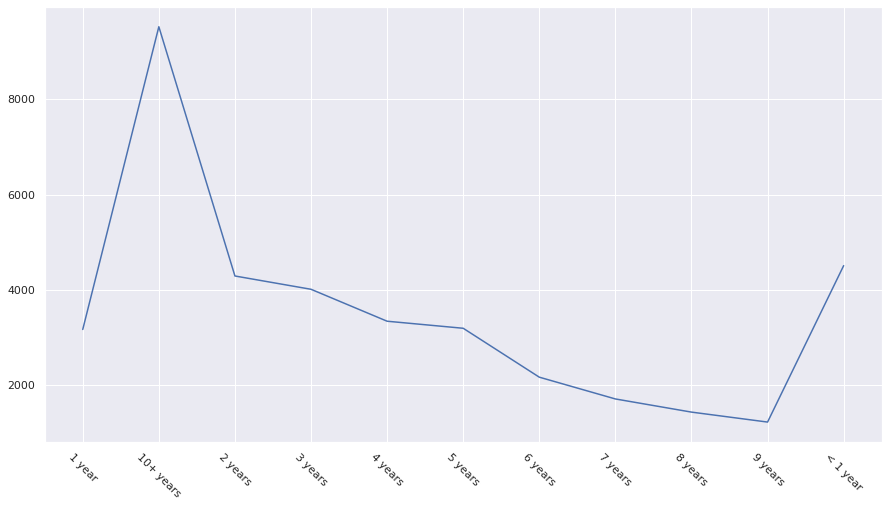

HISTOGRAM PLOT OF ' HOME_OWNERSHIP '


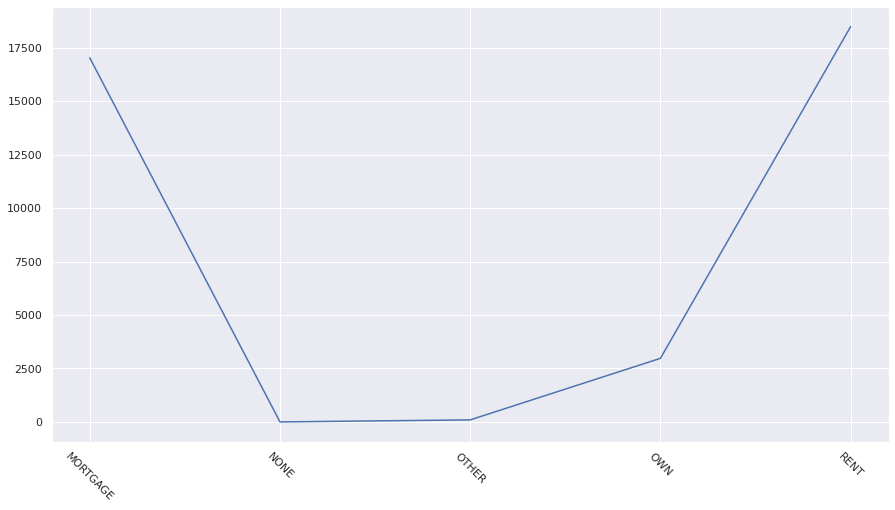

HISTOGRAM PLOT OF ' VERIFICATION_STATUS '


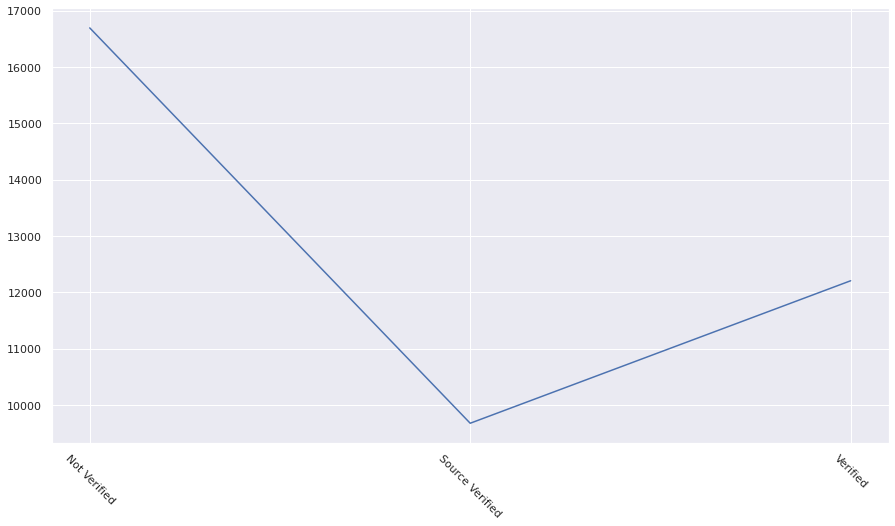

HISTOGRAM PLOT OF ' LOAN_STATUS '


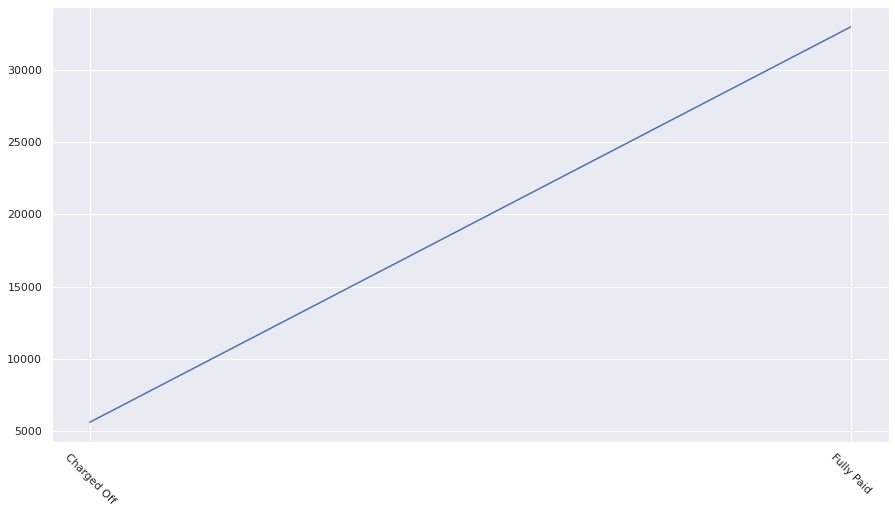

HISTOGRAM PLOT OF ' PURPOSE '


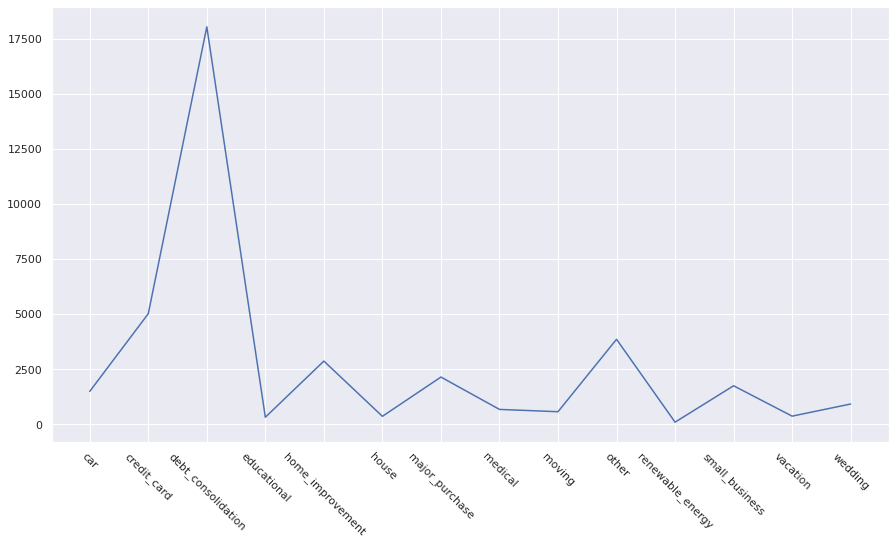

In [ ]:
for col in df[cat_cols]:
    print('HISTOGRAM PLOT OF',"'",col.upper(),"'")
    plt.figure(figsize = (15,8))
    plt.plot(pd.DataFrame(df.groupby(col)[col].count())) # Plot histogram pd.DataFrame(df.groupby(col)[col].count())
    plt.xticks(rotation = -45)
    plt.show()

##### Observations Categorical Values
1. *grade* - No of cases - max in B, then A, then in alphabetical order, 
2. *employment length* - max 10+years and then < 1yr, 
3. *home ownership* - highest - rent then mortgage cases. 
4. *verfication status* - max cases are not verified, 
5. *loan status* - max cases are fully paid, 
6. *purpose* - max cases are for debt consolidation followed by credit card.

#### Datetime Variables

HISTOGRAM PLOT OF ' ISSUE_D '


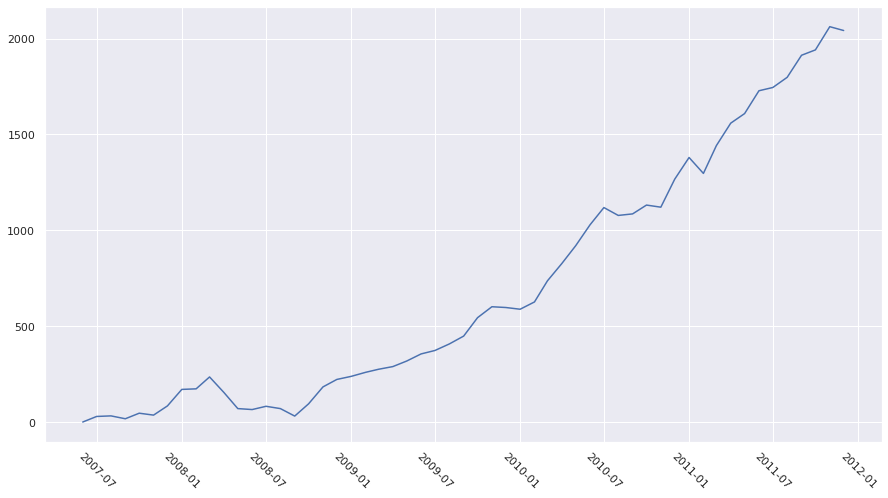

HISTOGRAM PLOT OF ' EARLIEST_CR_LINE '


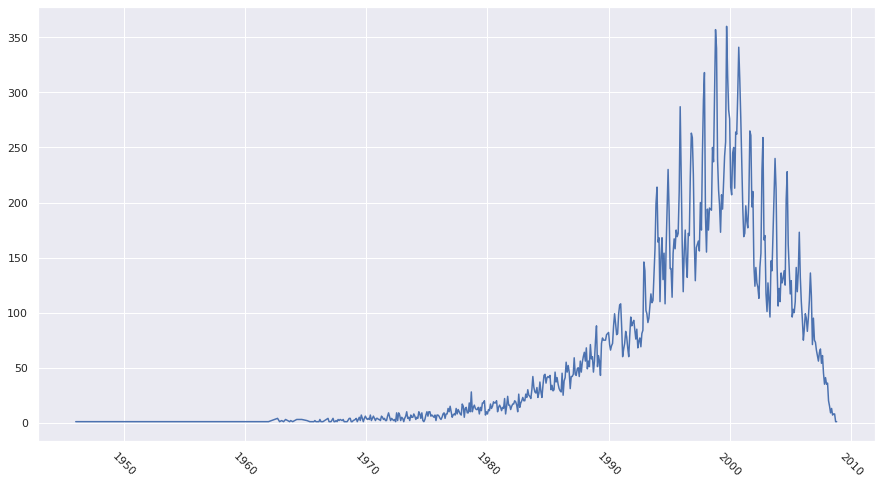

HISTOGRAM PLOT OF ' LAST_PYMNT_D '


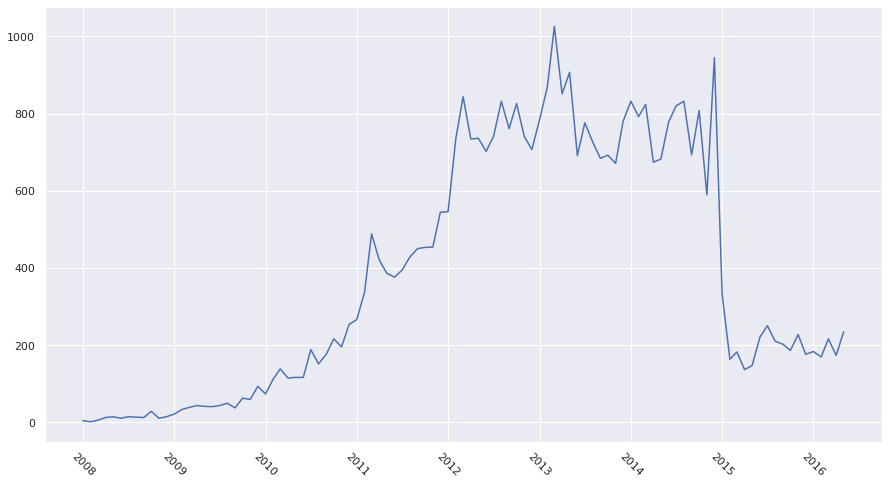

HISTOGRAM PLOT OF ' LAST_CREDIT_PULL_D '


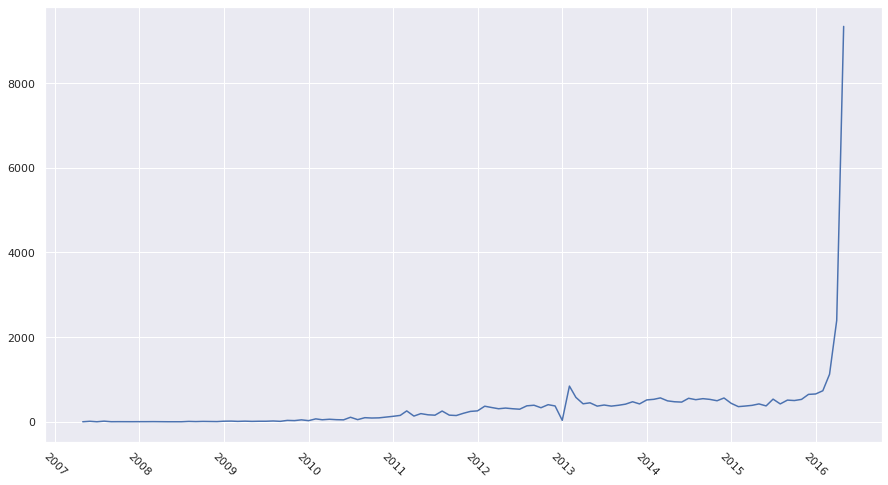

In [ ]:
for col in df[dt_cols]:
    print('HISTOGRAM PLOT OF',"'",col.upper(),"'")
    plt.figure(figsize = (15,8))
    plt.plot(pd.DataFrame(df.groupby(col)[col].count())) # Plot histogram pd.DataFrame(df.groupby(col)[col].count())
    plt.xticks(rotation = -45)
    plt.show()

##### Observations on Datetime Variables
1. issue date - most cases in 2012
2. earliest credit line - max in 2000
3. last payment date - peaks between 2012 and 2015
4. last credit pull date - peaks after 2016

### Bivariate Analyses

#### Numerical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   term                  38577 non-null  int64         
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   emp_length            38577 non-null  object        
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  dti             

##### Heatmap

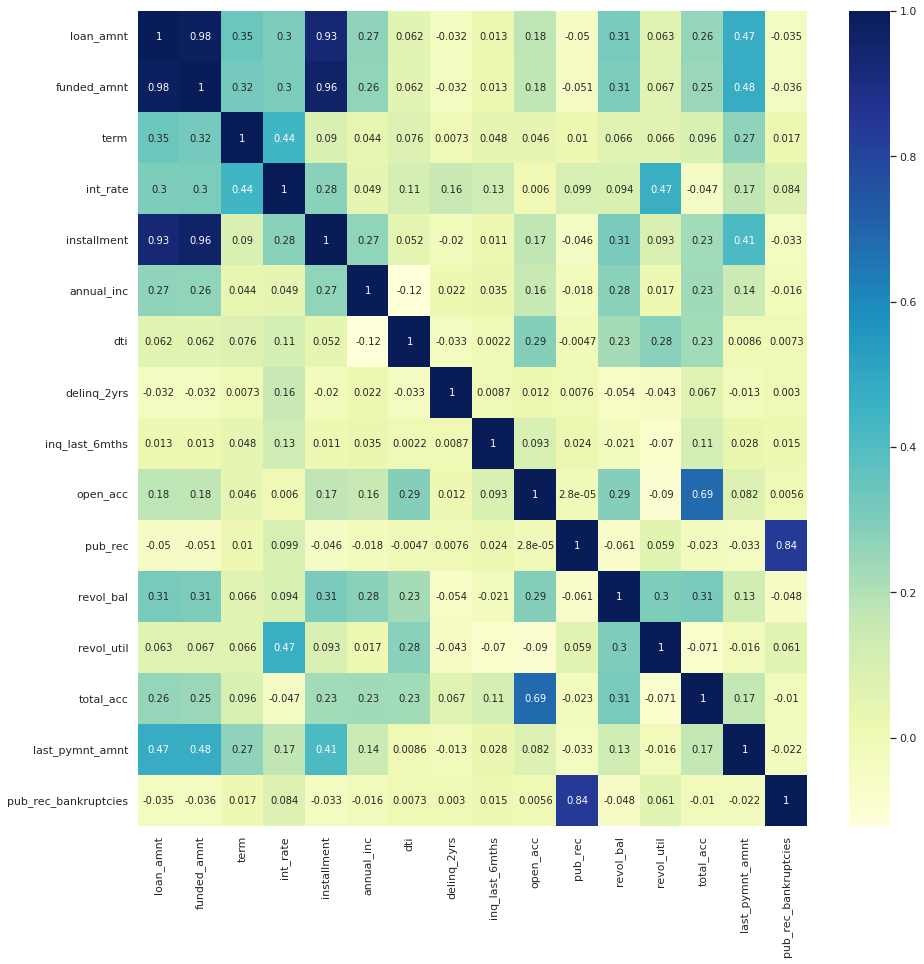

In [ ]:
# Correlation plot of numerical values

plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

##### Barplot

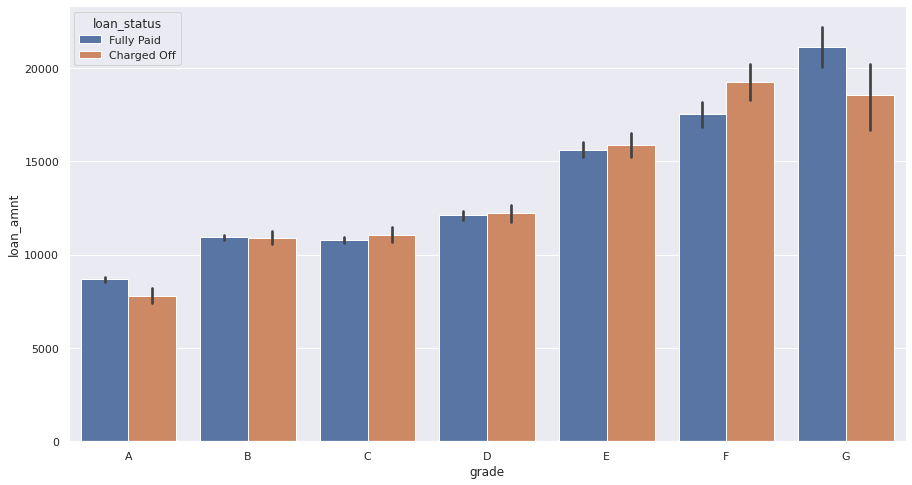

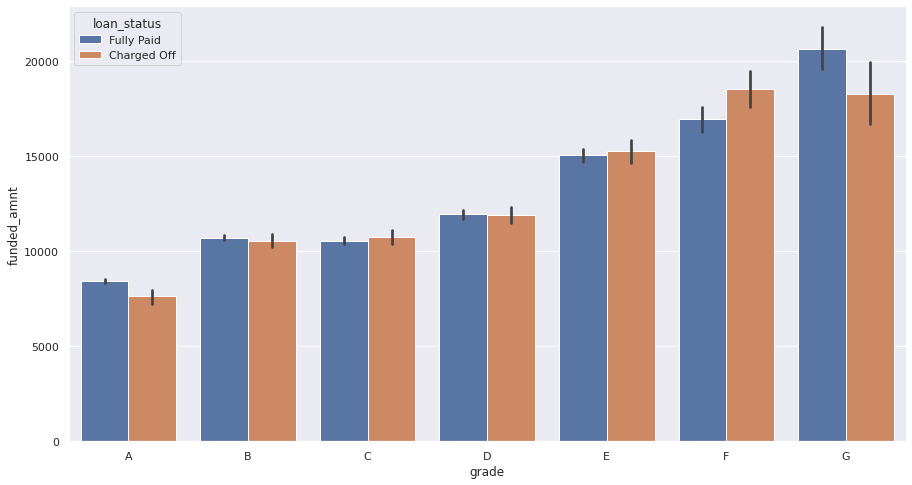

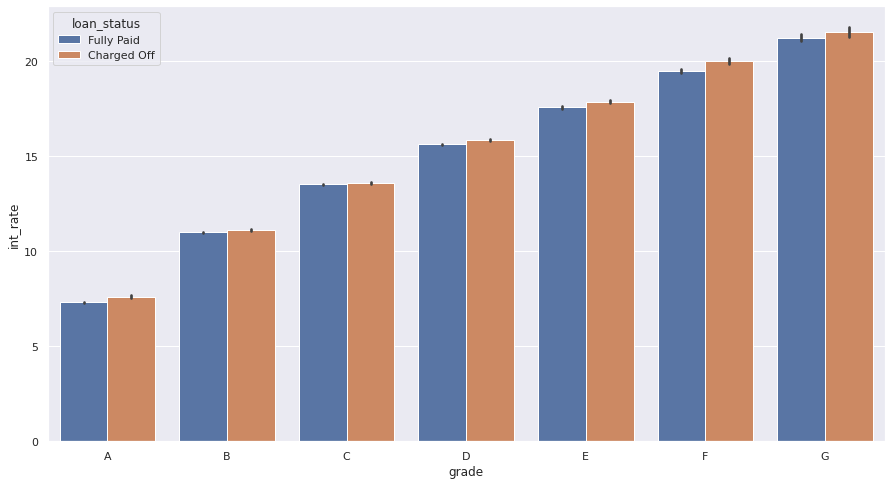

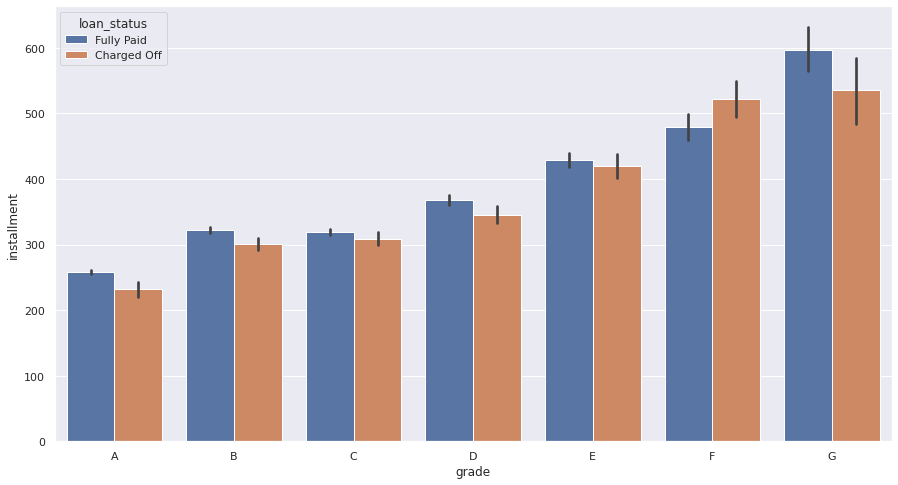

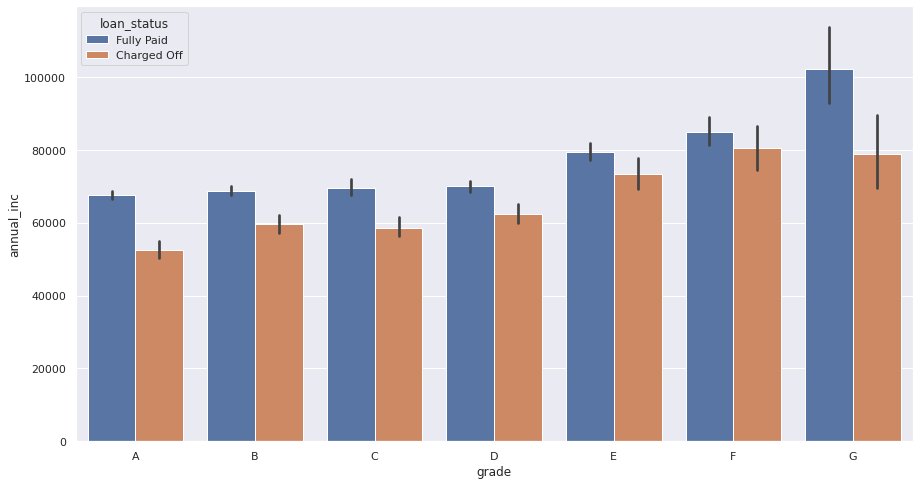

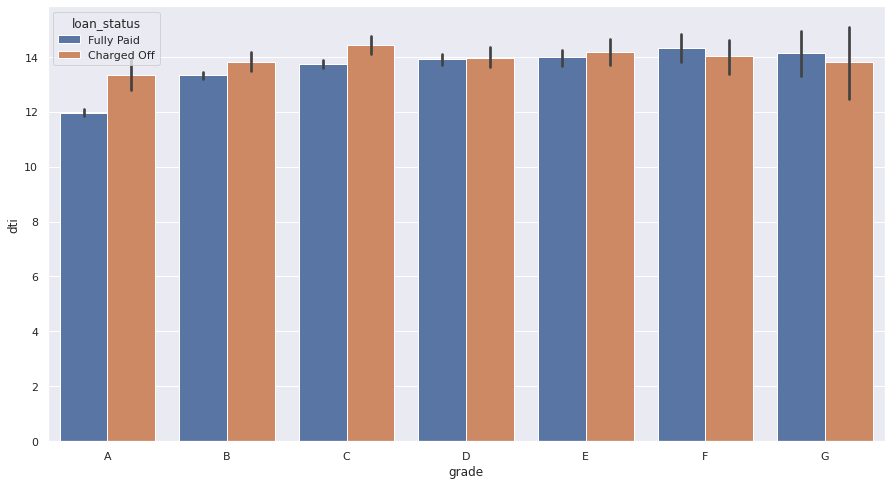

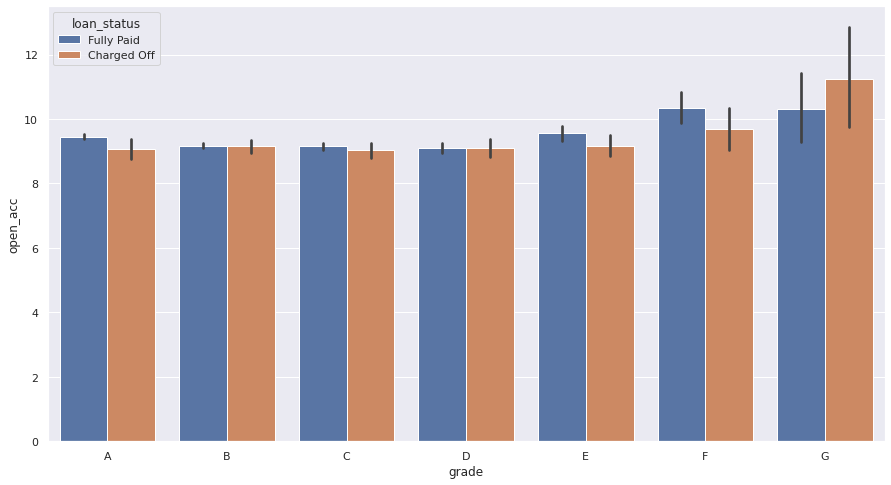

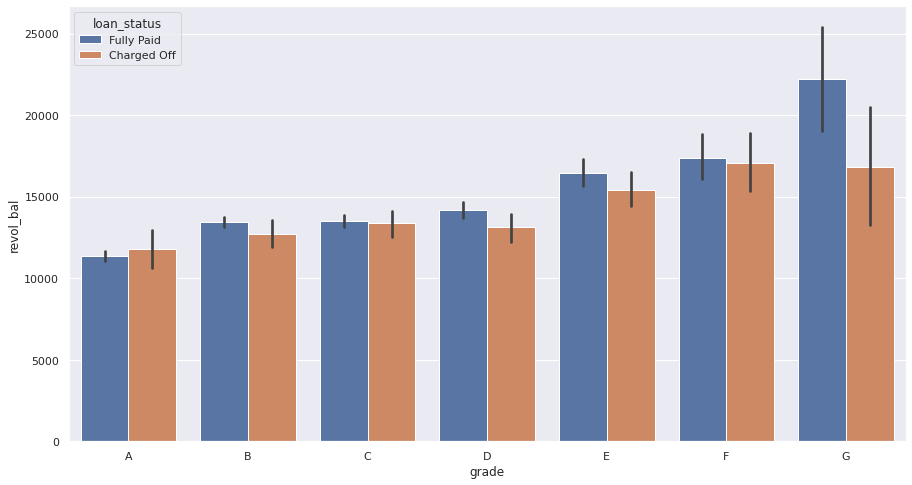

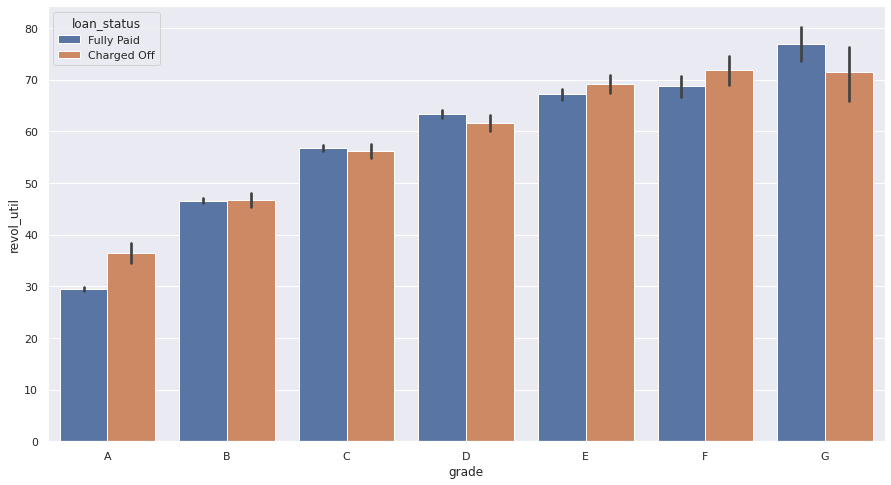

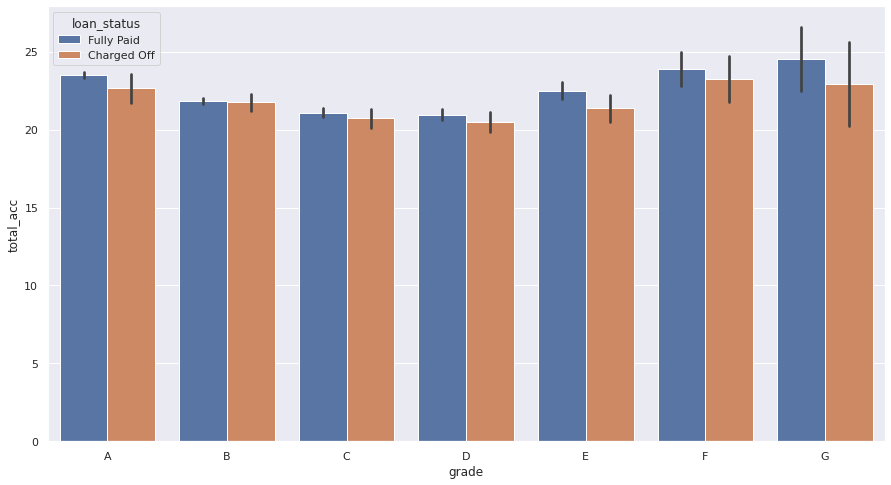

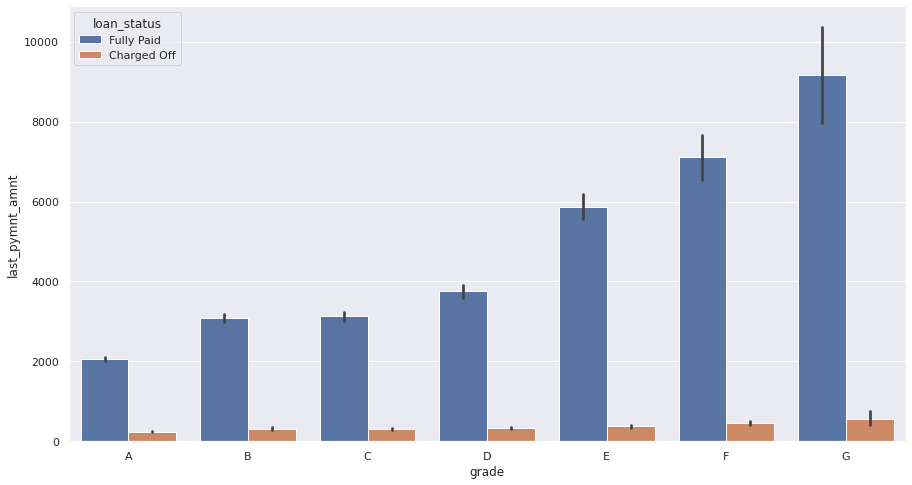

In [ ]:
for col in num_cols:
    plt.figure(figsize = (15,8))
    sns.barplot(x = 'grade', y = col,hue='loan_status', data = df, order=g_ord)

##### Pairplot

<Figure size 1080x576 with 0 Axes>

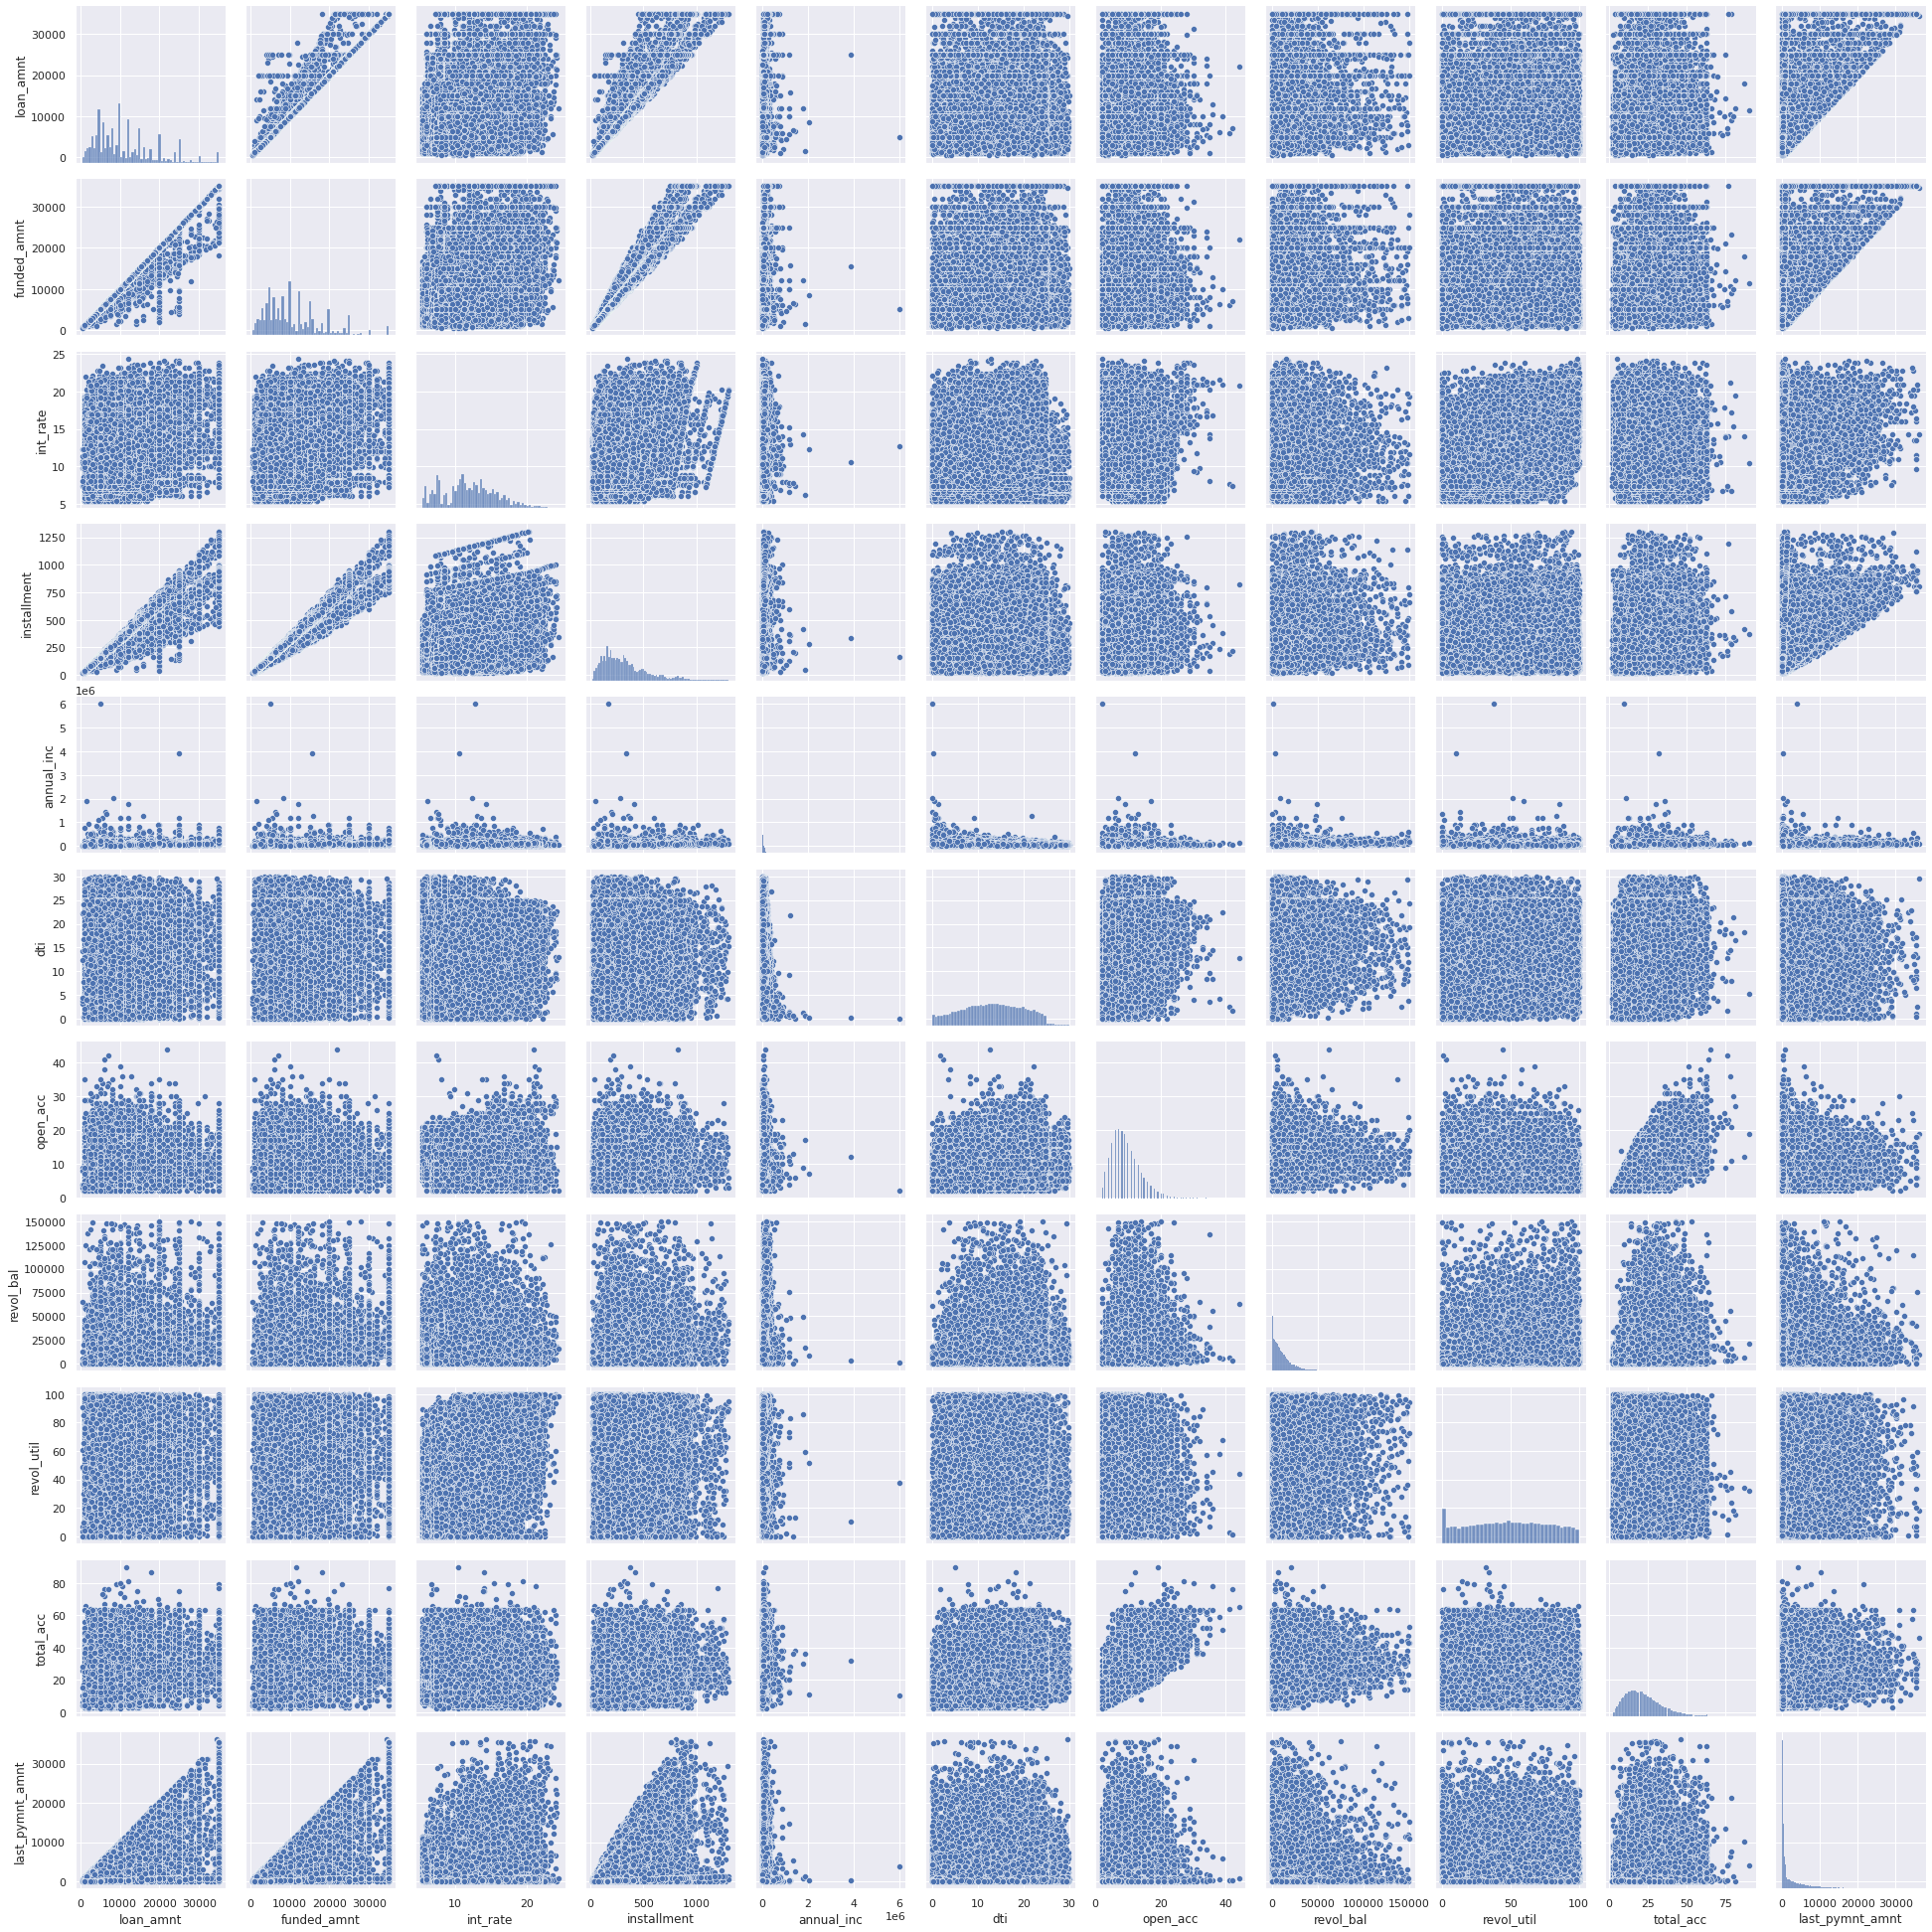

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(df[num_cols])

##### Observations on Numerical Variables
1. The highly correlated features are (pub_rec_bankruptcies, pub_rec), (total_acc, open_acc), (installment, (loan_amnt, funded_amnt)). The same is seen in heatmap and pairplot.
2. There is no significant negative correlation.
3. The features are showing logical pattern of correlation w.r.t. loan and customer attributes.
4. The barplot shows most numerical features follow grade ordering from A to G; Grade A showing least and G showing maximum. Features including dti, open_acc and total_acc however do not adhere to this gradation.

#### Numerical Categories

In [ ]:
num_cat

['term', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec_bankruptcies', 'pub_rec']

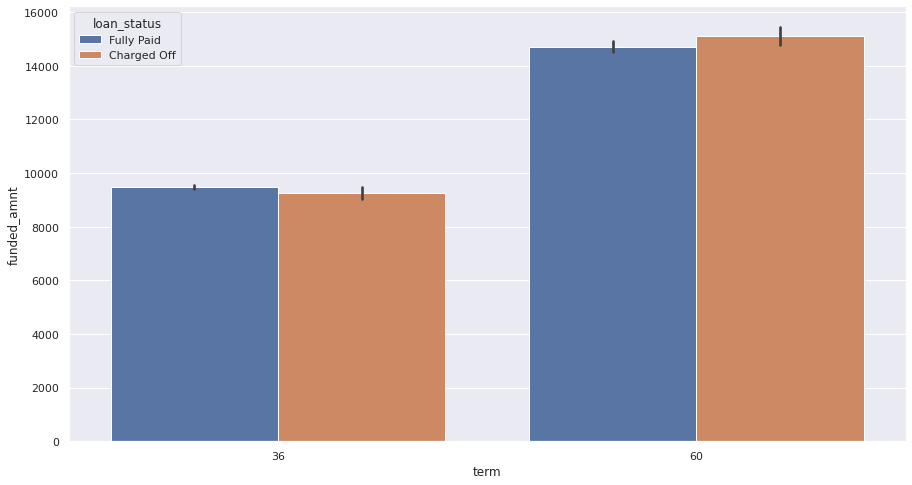

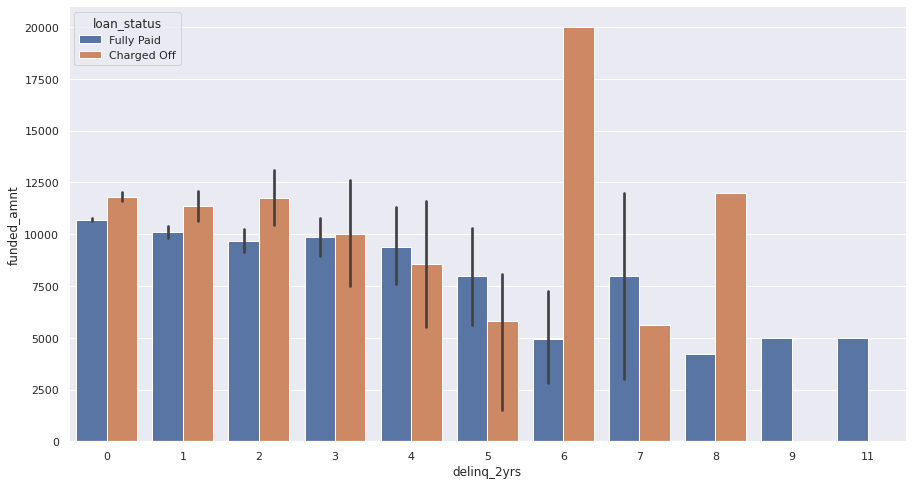

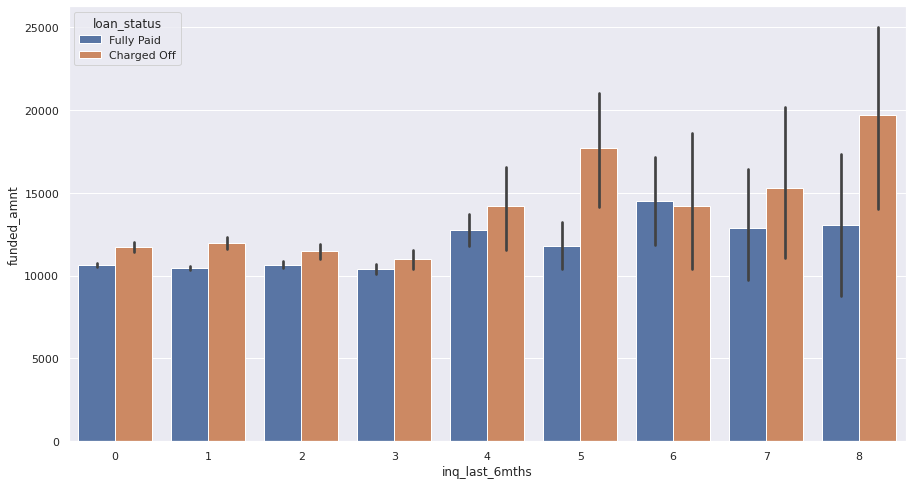

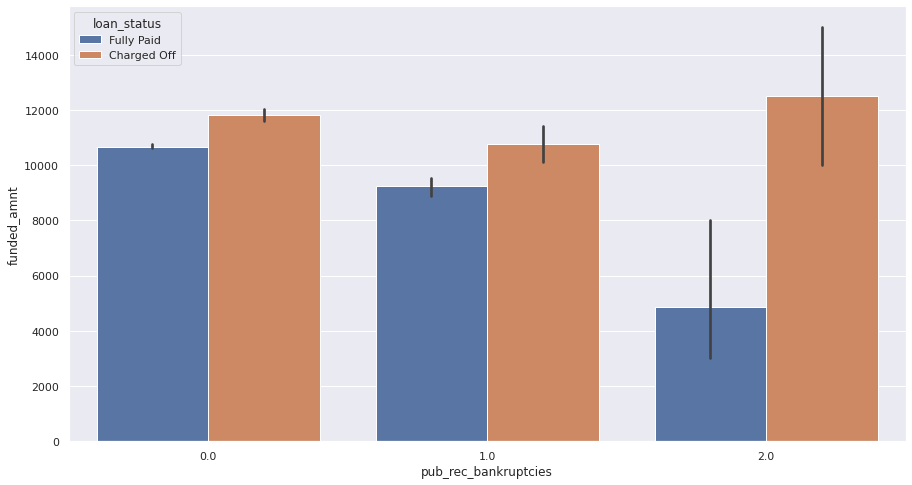

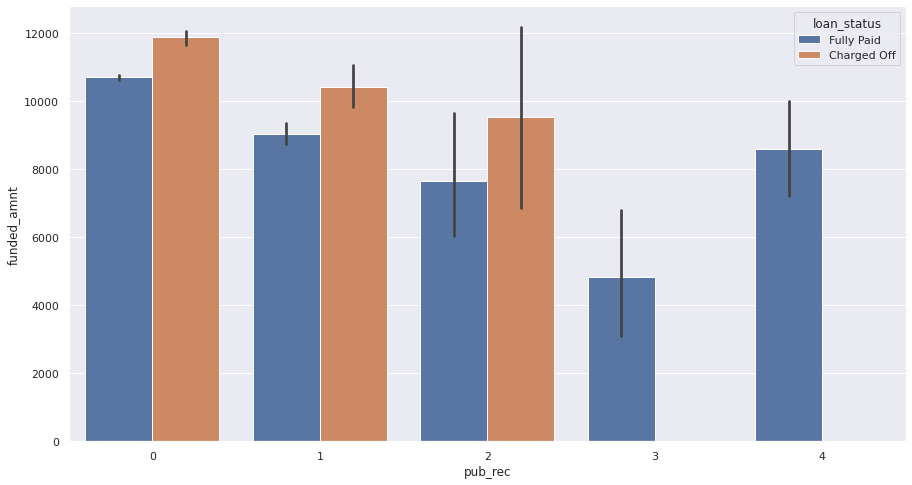

In [ ]:
for col in num_cat:
    plt.figure(figsize = (15,8))
    # plt.xticks(rotation = -45)
    sns.barplot(y = 'funded_amnt', x = col,hue='loan_status', data = df)

##### Observations on Numericl Categories
1. Funded amount is *higher for 60 months* term than 36 months term.
2. For delinquencies, it shows a reducing trend till five. In case of *six delinquencies, the default is maximum* followed by eight.
3. With increasing number of inquiries in last six months, the trend of default is observed to increase.
4. Default amount *increses* with incresae in public recorded bankruptcies.
5. Default amount *decreases* with increase in public record.


#### Categorical Values

In [ ]:
cat_cols

['grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose']

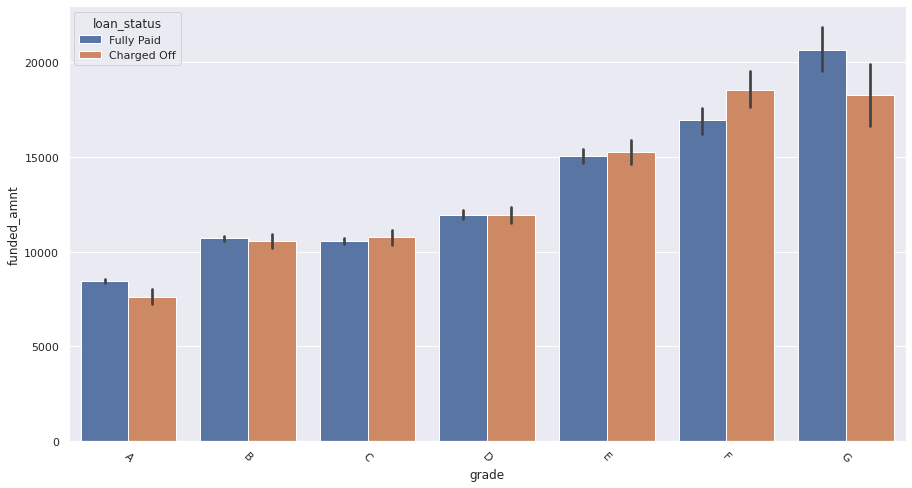

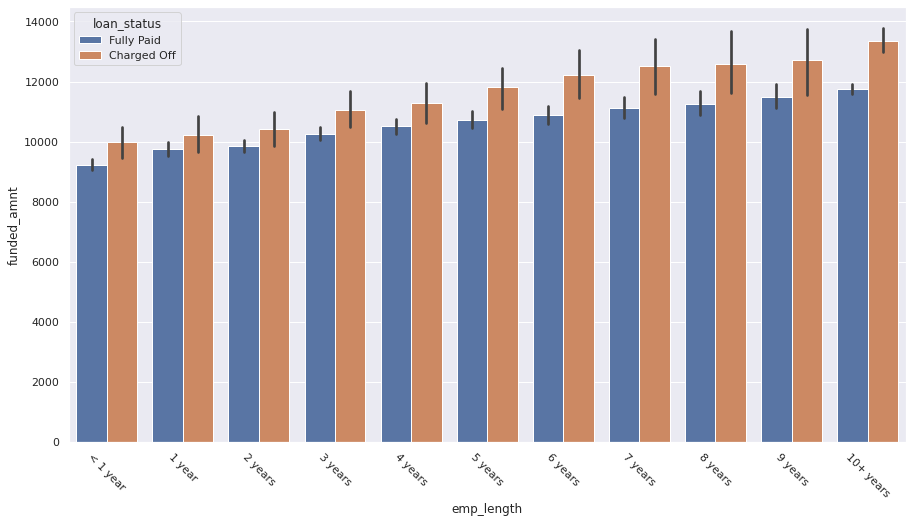

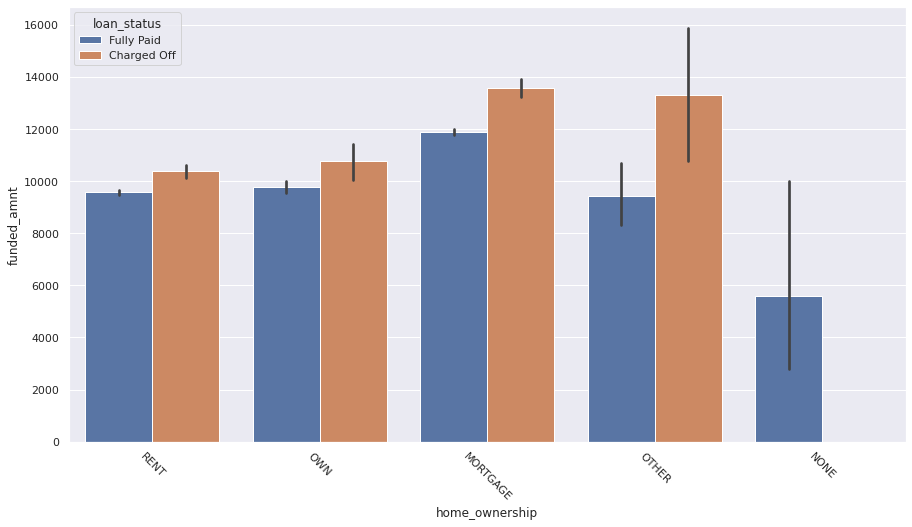

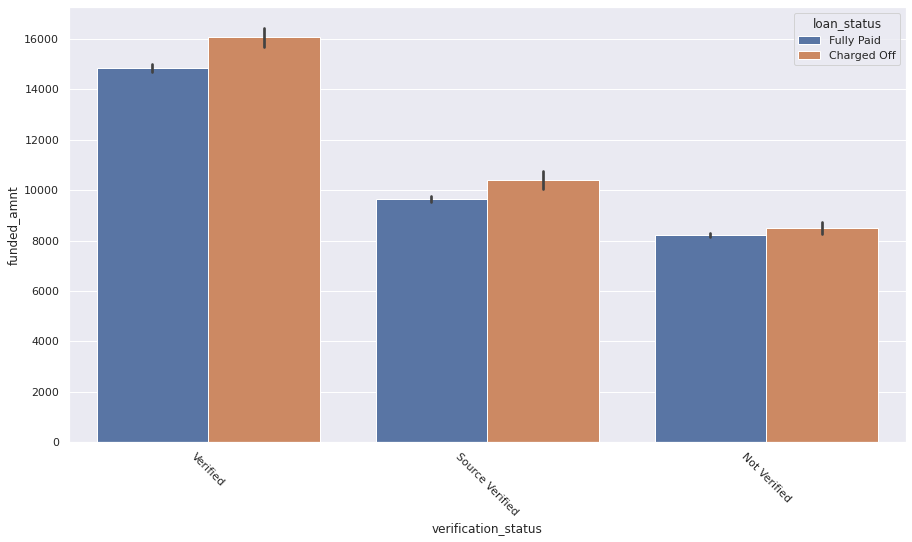

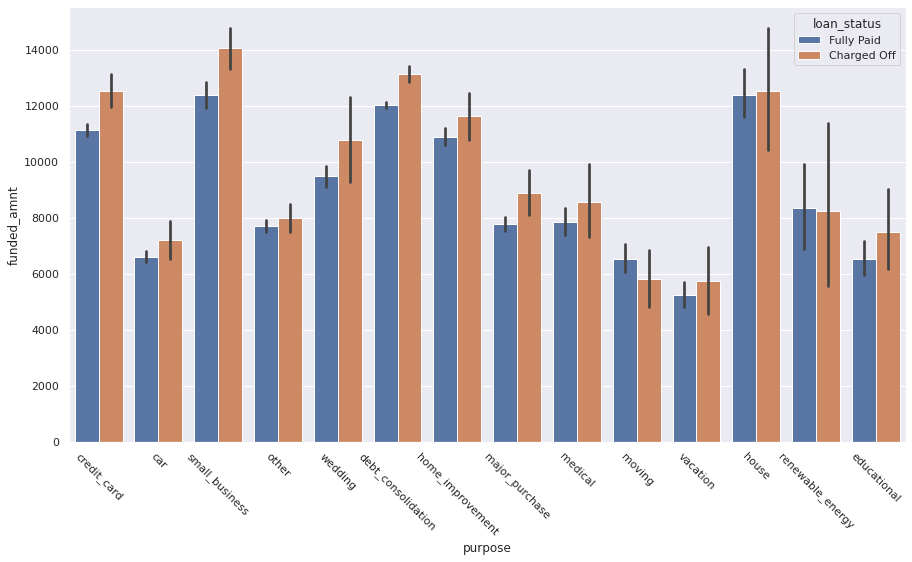

In [ ]:
for col in cat_cols:
    if col == 'loan_status':
        continue
    plt.figure(figsize = (15,8))
    plt.xticks(rotation = -45)
    if col == 'grade':
        sns.barplot(y = 'funded_amnt', x = col,hue='loan_status', data = df, order = g_ord)
    elif col =='emp_length':
        sns.barplot(y = 'funded_amnt', x = col,hue='loan_status', data = df, order=e_ord)
    else:
        sns.barplot(y = 'funded_amnt', x = col,hue='loan_status', data = df)

##### Observations on Categorical Values

1. Grade shows increasing trend from A to G.
2. Employment length shows increasing trend with higher length.
3. Home ownership shows maximum cases of default for mortgage followed by 'other'.
4. Max cases of default in verification status is for verified category.
5. Purpose shows maximum default cases for 'house' followed by 'small business' and 'debt consolidation'.



#### Datetime Variables

In [ ]:
dt_cols

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [ ]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])

issue_d
earliest_cr_line
last_pymnt_d
last_credit_pull_d


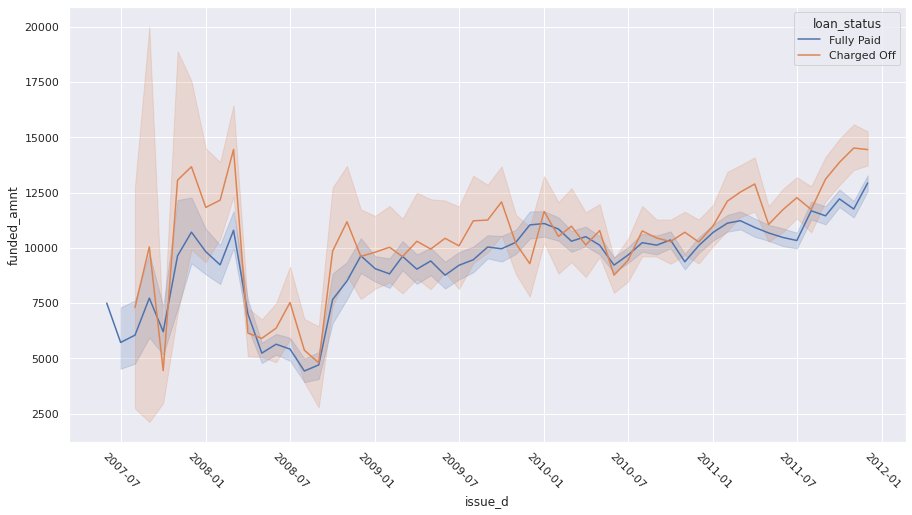

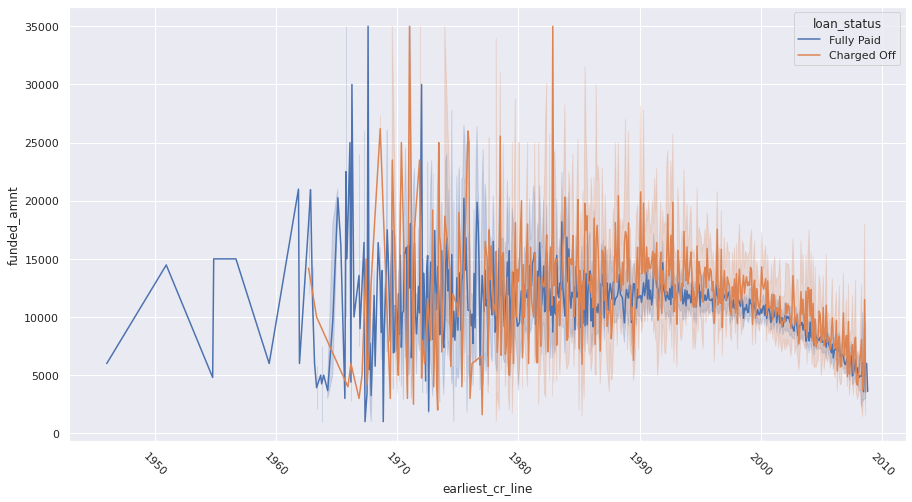

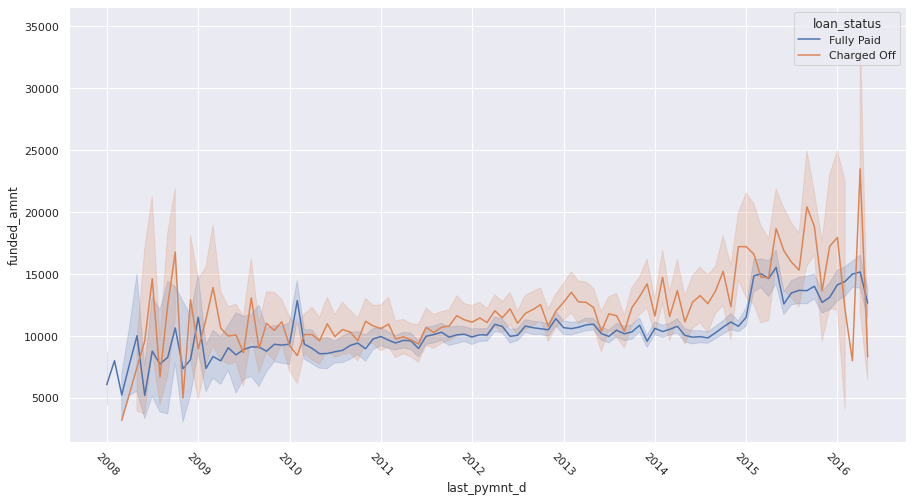

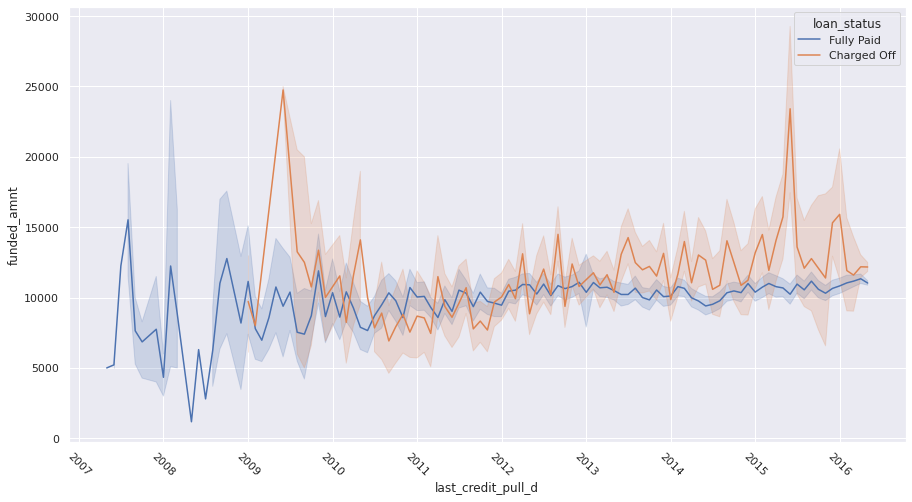

In [ ]:
for col in dt_cols:
    plt.figure(figsize = (15,8))
    plt.xticks(rotation = -45)
    print(col)
    sns.lineplot(y = 'funded_amnt', x = col,hue='loan_status', data = df)

##### Observations on Datatime Variables
1. In the case of earliest credit line, Charged Off cases are observed to commence around two decades post first fully paid case.
2. Other plots do not reveal any significant observations.


### Key Indicator and Metrics

1. Key Indicator.  In the dataset, the loan status is the key indicator. It indicates whether the loan has defaulted, currently running or fully paid. To categorise loan, we need to look at those cases that have either defaulted or fully paid. So, current loans can be disregarded. We will delete all rows with loan status as ‘Current’.

2. Metrics.  


> a. Having determined *installment*  as our key factor in the decision stage, we will derive metrics based on this. Installment will be matched with debt to arrive at this metric. In cases of house and vehicle loan, debt to income ratio is considered and in other cases, revolving utilisation rate is considered . Therefore, the ratio of installment amount to annual income added with debt to income ratio (*dti*) or revolving utilisation rate would provide an indication of the limit of loan capacity of a borrower.  The *revol_util* field in the instance case is the amount of credit the borrower is using. So, the debt part is *100 – revol_util*. The total debt percentage is representative of the loan grade.


> b. Prior proceeding to this calculation, we will investigate the data driven metric of length of credit history to verify if it has any bearing on the loan quality.

> c. The next stage is the monitoring of the loan. During this stage, the factors taken into account are the outstanding amounts and the last payment date. Since the last payment date can be either before or after the term completion, this information could provide some indication to the loan status.

> d. At the loan termination stage, the ratio of total amounts recovered to funded amount could provide insight to the loan quality.




#### Data Driven Metrics

Define data driven metric of length of credit history

In [517]:
# Calculate and describe difference between earliest credit line and issue date.

df.loc[~df['issue_d'].isna(), 'len_cr_hist'] = (df['issue_d'] - df['earliest_cr_line'])/np.timedelta64(1,'M')
df['len_cr_hist'].describe()

count    38577.000000
mean       164.667785
std         81.974149
min         35.976098
25%        109.012505
50%        149.982546
75%        203.995975
max        784.968891
Name: len_cr_hist, dtype: float64

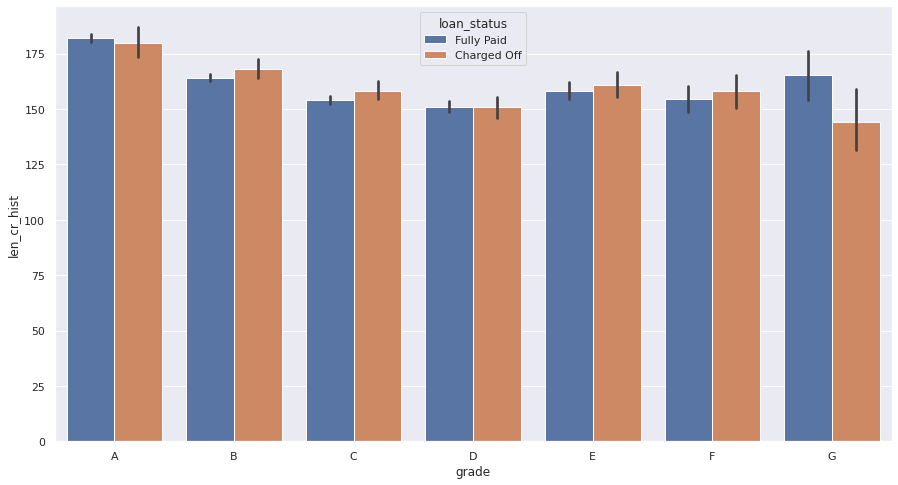

In [518]:
# Describe its relation with loan status

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade', y = 'len_cr_hist', hue = 'loan_status', data = df, order=g_ord)

##### Observation 
The length of credit history has no significance on grade and loan status. 

Define data driven metric of installment income percentage

In [524]:
# Create Installment Income percentage

df.loc[:,'inst_inc_p'] = df['installment']*1200/df['annual_inc']
df['inst_inc_p'].describe()

count    38577.000000
mean         6.562281
std          4.005438
min          0.028895
25%          3.501634
50%          5.768889
75%          8.814720
max         32.026200
Name: inst_inc_p, dtype: float64

##### Analyse installment to income percentage

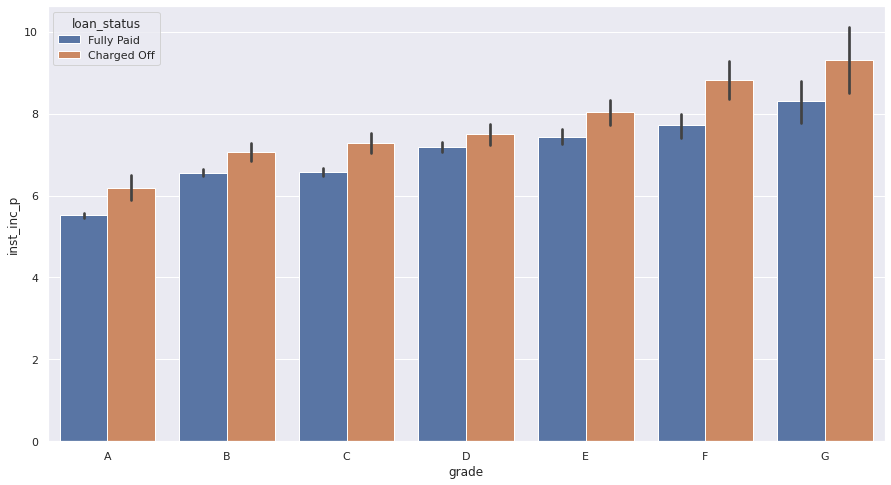

In [525]:
# Describe installment income percentage against categorical features like grade, employment length and verification status over loan status

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade', y = 'inst_inc_p', hue = 'loan_status', data = df, order =  g_ord)

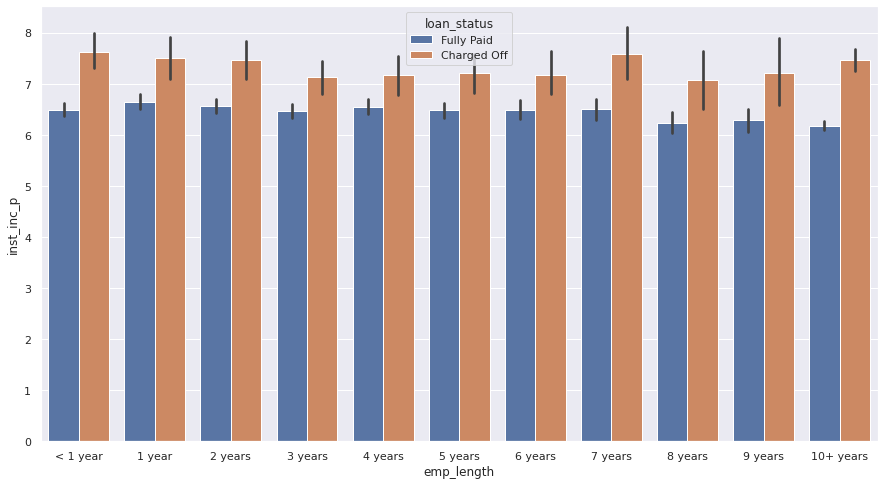

In [526]:
# Describe with employment length

plt.figure(figsize = (15,8))
sns.barplot(x = 'emp_length', y = 'inst_inc_p', hue = 'loan_status', data = df, order =  e_ord)

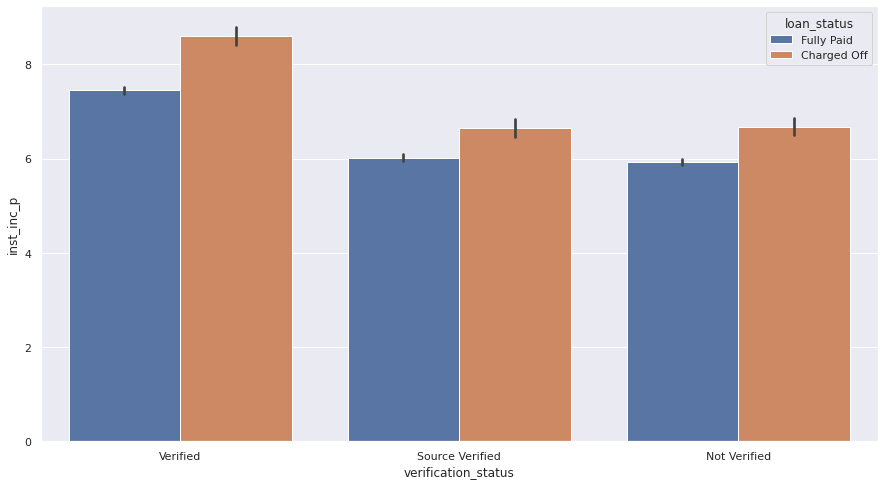

In [527]:
# Describe with verification status

plt.figure(figsize = (15,8))
sns.barplot(x = 'verification_status', y = 'inst_inc_p', hue = 'loan_status', data = df)

##### Observation of data driven metric, Installment Income Percentage

1. This metric displays a unique quality. Cases of loan default ('Charged Off' type) show higher percentage than cases of no loan default ('Fully Paid' type). Therefore, limits of fully paid type of loan status for all categories can be used as indicative information for classifying loan as defaulting or non defaulting.

##### Investigate accounts attributes
Investigate if number of accounts has a bearing on loan quality. For this purpose, we will derive a data driven metric of ratio between open accounts and total account and then plot this ratio against categorical variables

In [577]:
# Data metric
# Derive account ratio between open and total accounts

df.loc[:,'acc_r'] = df['open_acc'] / df['total_acc']
df['acc_r'].describe()

count    38577.000000
mean         0.470873
std          0.186648
min          0.051282
25%          0.333333
50%          0.444444
75%          0.583333
max          1.750000
Name: acc_r, dtype: float64

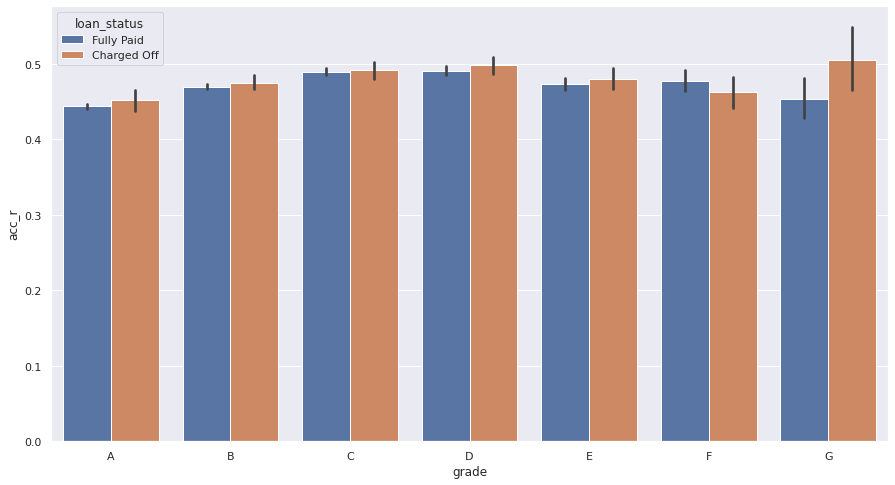

In [578]:
# Check with grade

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade', y = 'acc_r', hue = 'loan_status', data = df, order = g_ord)

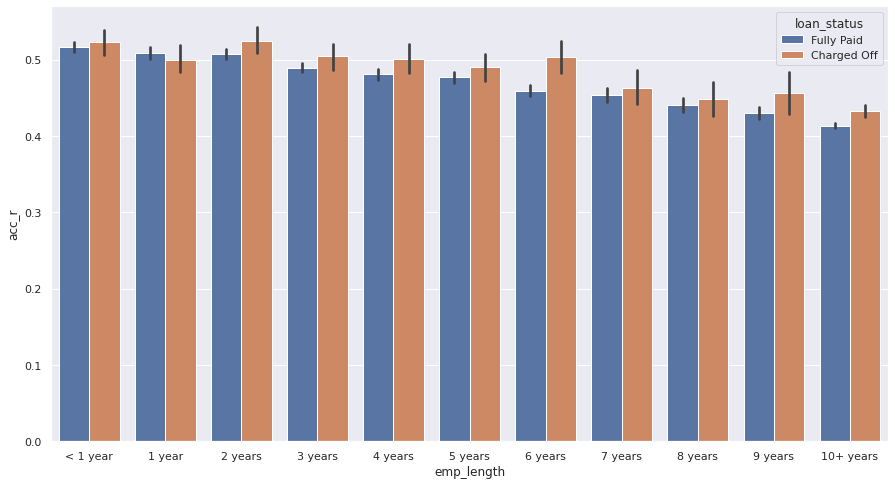

In [579]:
# Check with emp length

plt.figure(figsize = (15,8))
sns.barplot(x = 'emp_length', y = 'acc_r', hue = 'loan_status', data = df, order = e_ord)

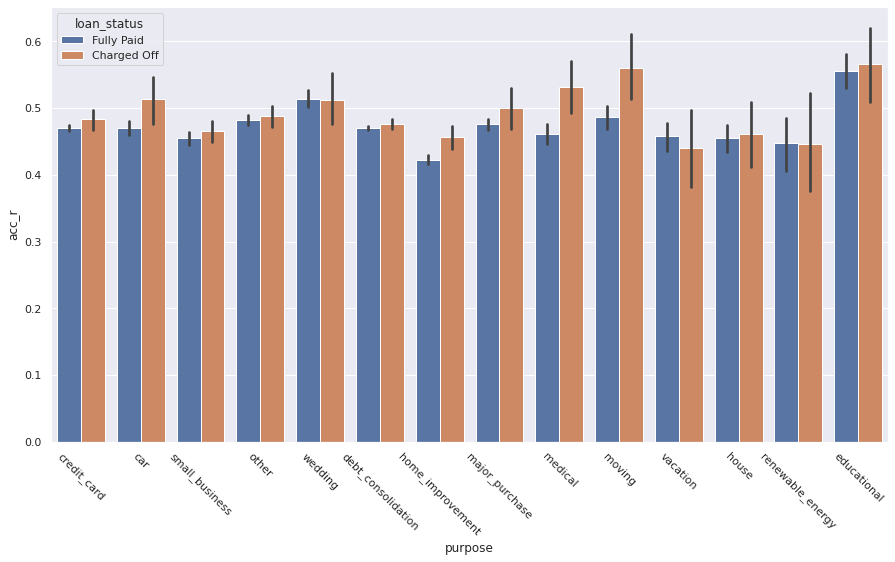

In [580]:
# Check with purpose of loan

plt.figure(figsize = (15,8))
plt.xticks(rotation = -45)
sns.barplot(x = 'purpose', y = 'acc_r', hue = 'loan_status', data = df)

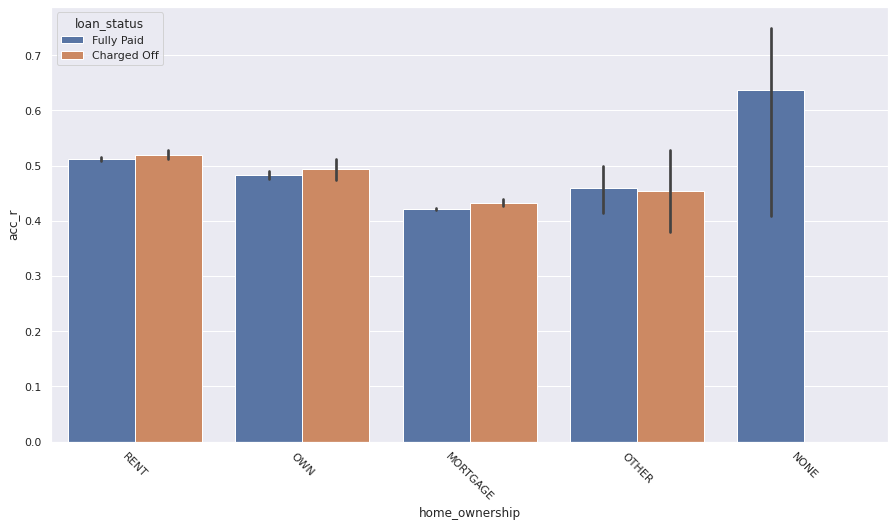

In [581]:
# Check with home ownership

plt.figure(figsize = (15,8))
plt.xticks(rotation = -45)
sns.barplot(x = 'home_ownership', y = 'acc_r', hue = 'loan_status', data = df)

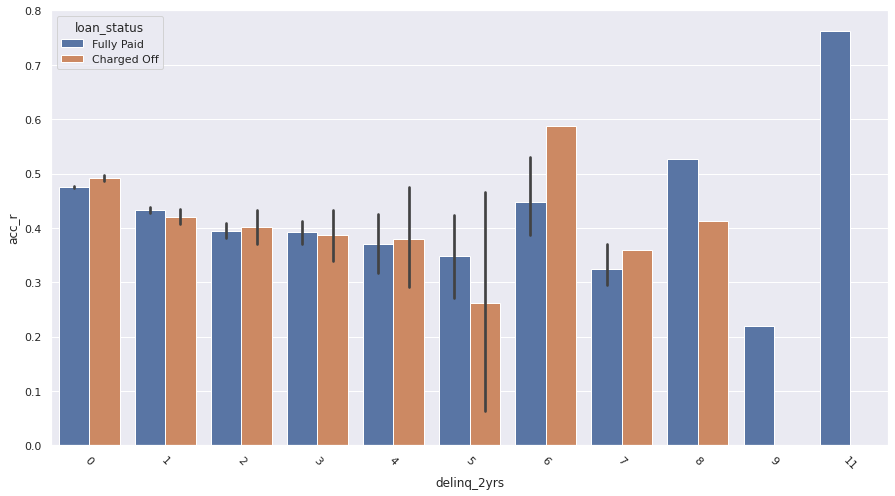

In [582]:
# Check with delinquency

plt.figure(figsize = (15,8))
plt.xticks(rotation = -45)
sns.barplot(x = 'delinq_2yrs', y = 'acc_r', hue = 'loan_status', data = df)

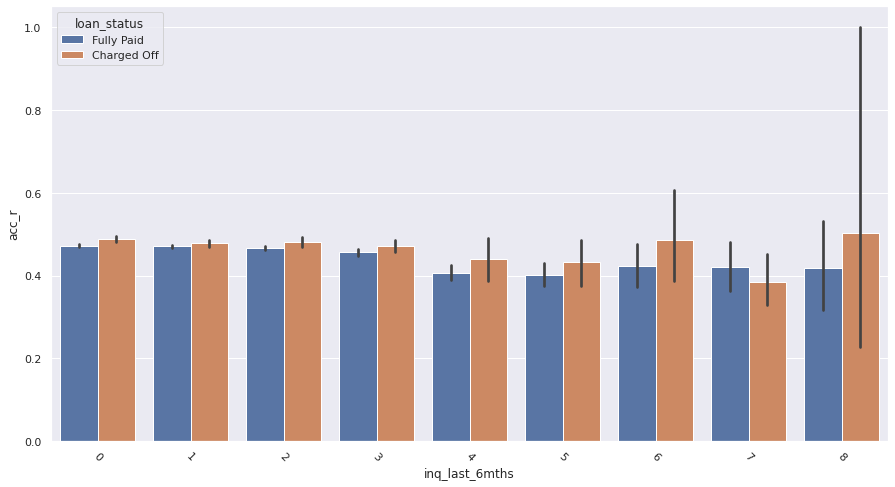

In [583]:
# Check with inquiries in the past 6months

plt.figure(figsize = (15,8))
plt.xticks(rotation = -45)
sns.barplot(x = 'inq_last_6mths', y = 'acc_r', hue = 'loan_status', data = df)

##### Observation of account ratio metric

1. Account ratio metric displays a pattern that can lead to identifying default cases.
2. In cases of categorical variables including grade, employment length, purpose, home ownership, delinquencies and inquiries, it has shown that the ratio for fully paid loan cases can be used as a limit to grant loan.

#### Business Driven Metric

Since the decision for loan considers debt as a major factor, we need to investigate the ratio of instalment to income with debt to income ratio and with revolving utility rate, being the only debt indicators in the data.

In [529]:
# Get total of inst_inc_p with dti and revol_util

df['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [530]:
df['revol_util'].describe()

count    38577.000000
mean        48.702944
std         28.346353
min          0.000000
25%         25.200000
50%         49.000000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [531]:
df.loc[:,'inst_revutil_p'] = df['inst_inc_p'] + 100 - df['revol_util']
df.loc[:,'inst_dti_p'] = df['inst_inc_p'] + df['dti']
df['inst_revutil_p'].describe(), df['inst_dti_p'].describe()

(count    38577.000000
 mean        57.859337
 std         28.394945
 min          1.296154
 25%         34.634500
 50%         57.665474
 75%         81.121338
 max        129.385000
 Name: inst_revutil_p, dtype: float64, count    38577.000000
 mean        19.835008
 std          8.216462
 min          0.043568
 25%         13.666800
 50%         19.776750
 75%         25.810044
 max         42.962894
 Name: inst_dti_p, dtype: float64)

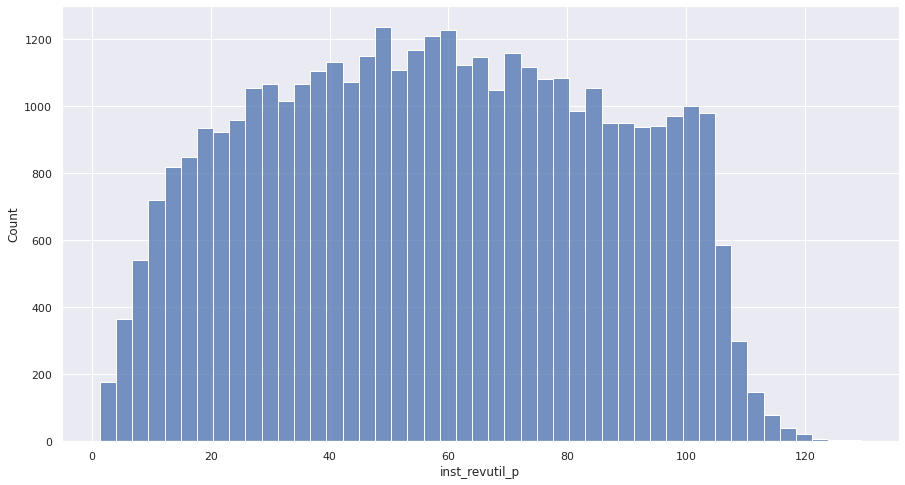

In [532]:
# Plot histogram of debt percentages for dti and revolving utility rate

plt.figure(figsize = (15,8))
sns.histplot(df['inst_revutil_p'])

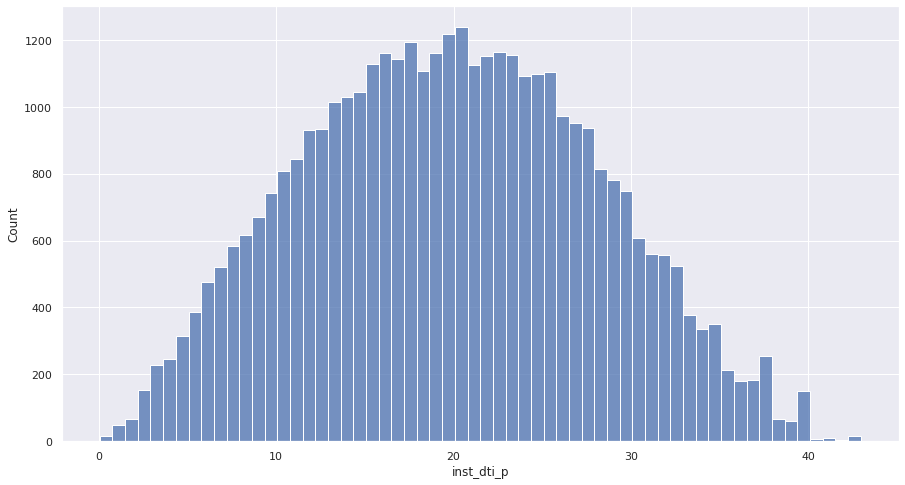

In [533]:
plt.figure(figsize = (15,8))
sns.histplot(df['inst_dti_p'])

In [534]:
# Describe effect of installment to dti and revolving utility rate 
# percentage against loan status

df.groupby('loan_status')['inst_dti_p'].describe(), df.groupby('loan_status')['inst_revutil_p'].describe()

(               count       mean       std       min        25%        50%  \
 loan_status                                                                 
 Charged Off   5627.0  21.373789  8.108366  0.166378  15.574211  21.569935   
 Fully Paid   32950.0  19.572225  8.206106  0.043568  13.388634  19.481782   
 
                    75%        max  
 loan_status                        
 Charged Off  27.294067  42.790720  
 Fully Paid   25.558396  42.962894  ,
                count       mean        std       min        25%        50%  \
 loan_status                                                                  
 Charged Off   5627.0  51.820219  28.199820  1.344250  28.579852  48.859459   
 Fully Paid   32950.0  58.890661  28.300014  1.296154  35.963430  59.173789   
 
                    75%         max  
 loan_status                         
 Charged Off  73.046927  126.255846  
 Fully Paid   82.383250  129.385000  )

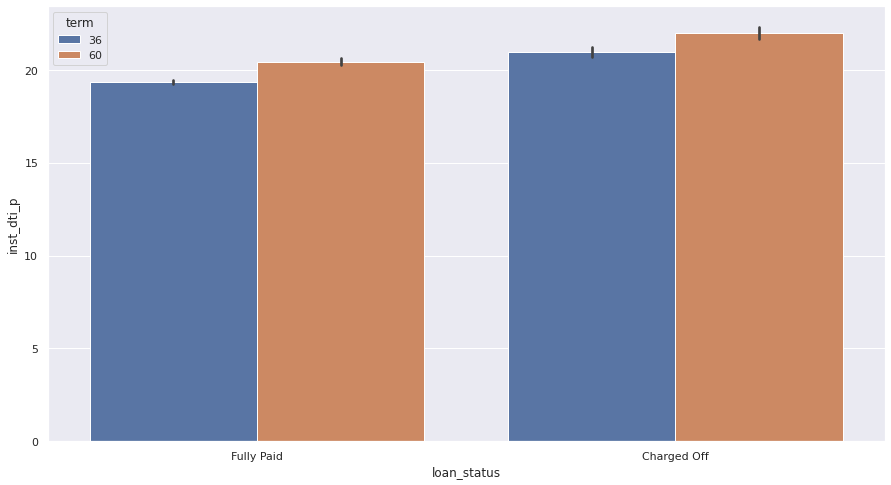

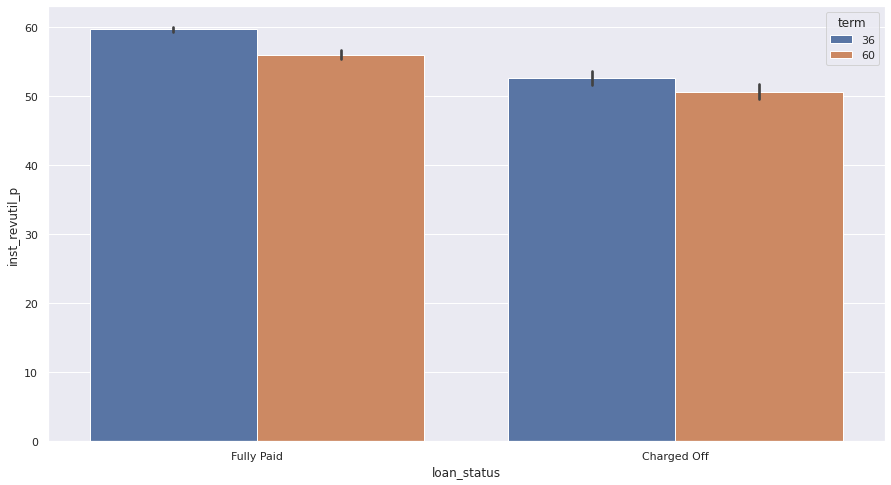

In [535]:
# Plot with loan status

inst_debt = ['inst_dti_p','inst_revutil_p']

for item in inst_debt:
    plt.figure(figsize = (15,8))
    sns.barplot(x = 'loan_status', y = item, data = df, hue = 'term')

The debt consideration is undertaken differently for different purposes. In case where the purpose of loan is car or house, the debt indicator considered is the debt to income percentage and in all other cases, it is revolving utility rate. Therefore, the two business driven metrics need to be investigated for their respective sets of data containing respective purposes.

We will divide the dataframe into two sets; one to be considered for purposes of car and house and the other for remaining purposes of loan.

In [538]:
# Divide dataframe based on purpose

df_dti = df[
            (df['purpose']=='car') |
            (df['purpose']=='house')
]

df_revutil = df[
            (df['purpose']!='car') &
            (df['purpose']!='house')
]

In [539]:
df_dti['purpose'].unique()

array(['car', 'house'], dtype=object)

In [540]:
df_revutil['purpose'].unique()

array(['credit_card', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'renewable_energy', 'educational'],
      dtype=object)

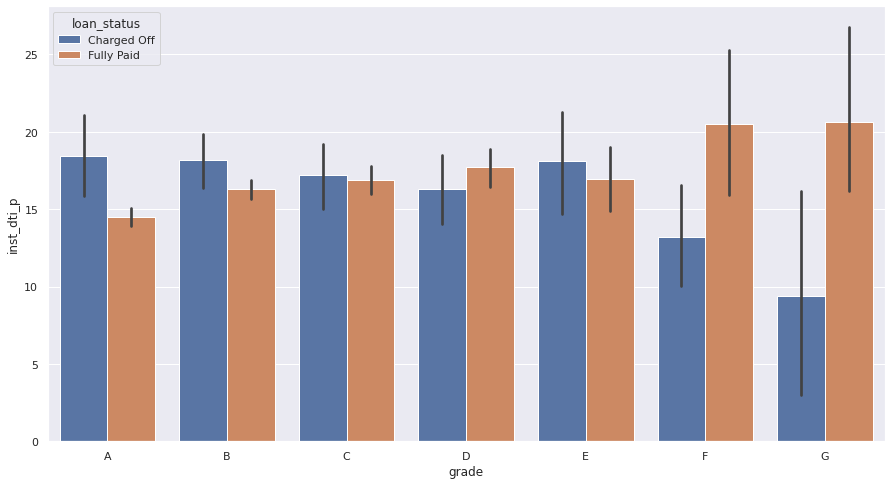

In [541]:
# Plot with grade


plt.figure(figsize = (15,8))
sns.barplot(x = 'grade',y = 'inst_dti_p', hue = 'loan_status',data = df_dti,\
            order=g_ord)

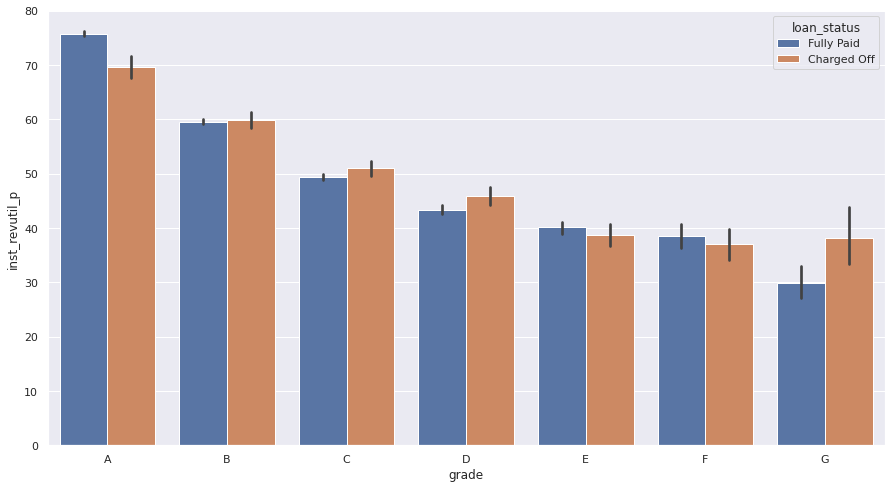

In [542]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'grade',y = 'inst_revutil_p', hue = 'loan_status',data = df_revutil,\
            order=g_ord)

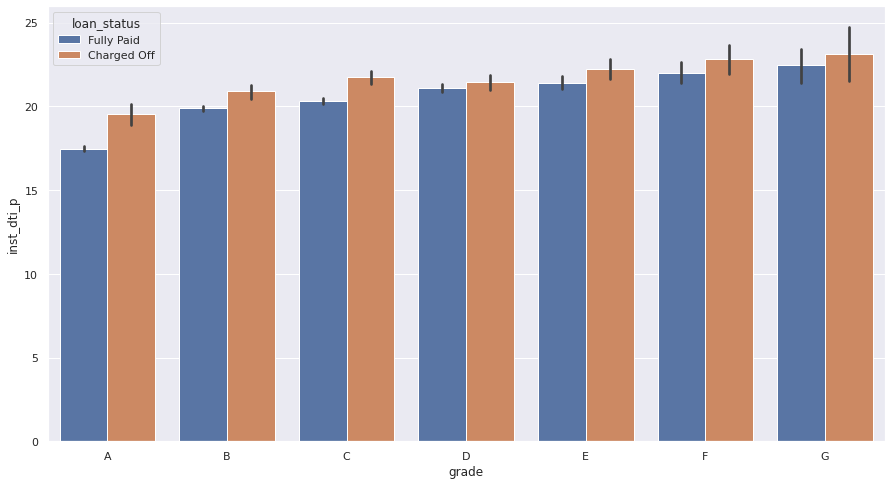

In [547]:
# Check debt percentage for whole dataframe using dti

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade',y = 'inst_dti_p', hue = 'loan_status',data = df,\
            order=g_ord)

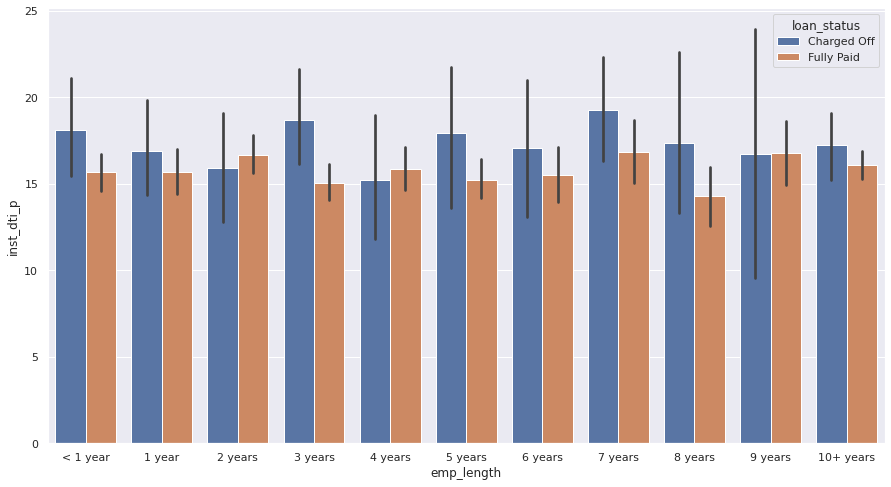

In [544]:
# Description with employment length
# Checking with dti

plt.figure(figsize = (15,8))
sns.barplot(x = 'emp_length',y = 'inst_dti_p', hue = 'loan_status',data = df_dti,\
            order=e_ord)

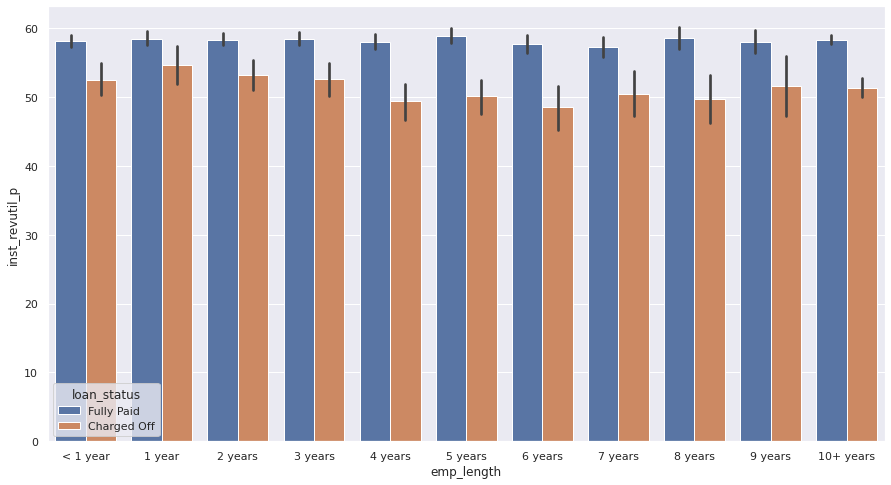

In [545]:
# checking with revolving utility rate

plt.figure(figsize = (15,8))
sns.barplot(x = 'emp_length',y = 'inst_revutil_p', hue = 'loan_status',data = df_revutil,\
            order=e_ord)

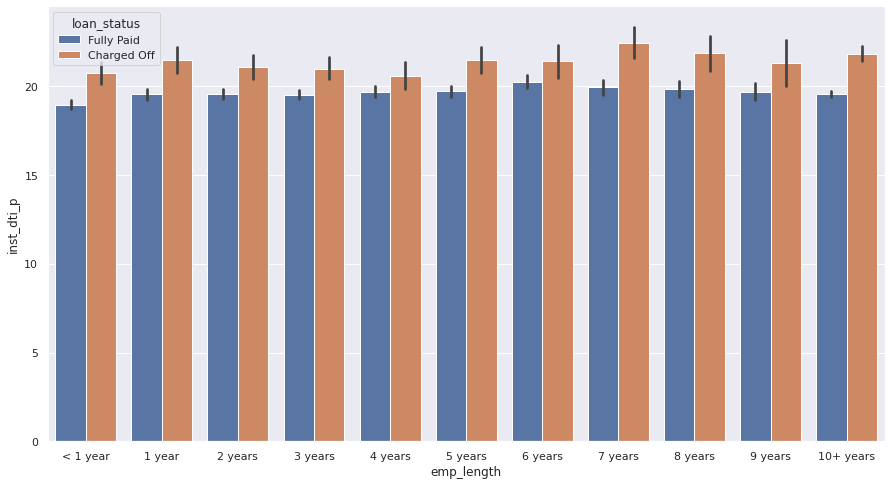

In [546]:
# Check debt percentage over complete dataframe using dti

plt.figure(figsize = (15,8))
sns.barplot(x = 'emp_length',y = 'inst_dti_p', hue = 'loan_status',data = df,\
            order=e_ord)

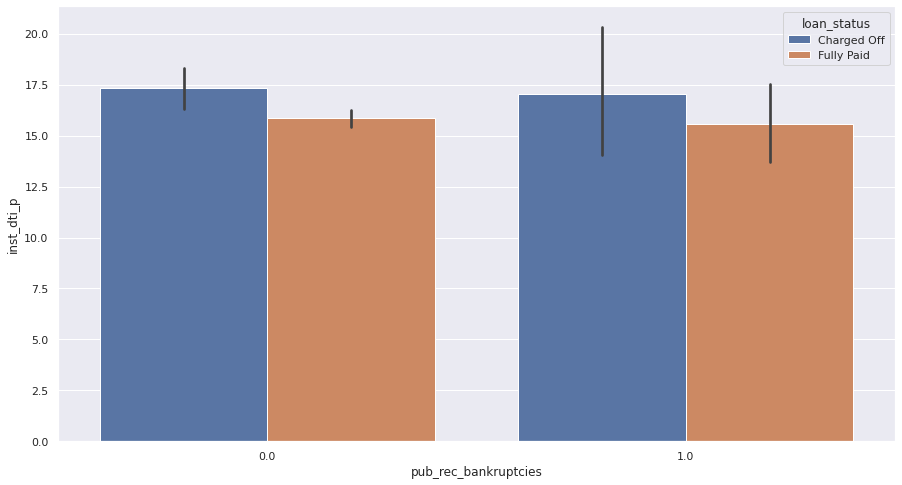

In [549]:
# Plot for public recorded bankruptcies
# Plotting with dti

plt.figure(figsize = (15,8))
sns.barplot(x = 'pub_rec_bankruptcies',y = 'inst_dti_p', hue = 'loan_status',data = df_dti)

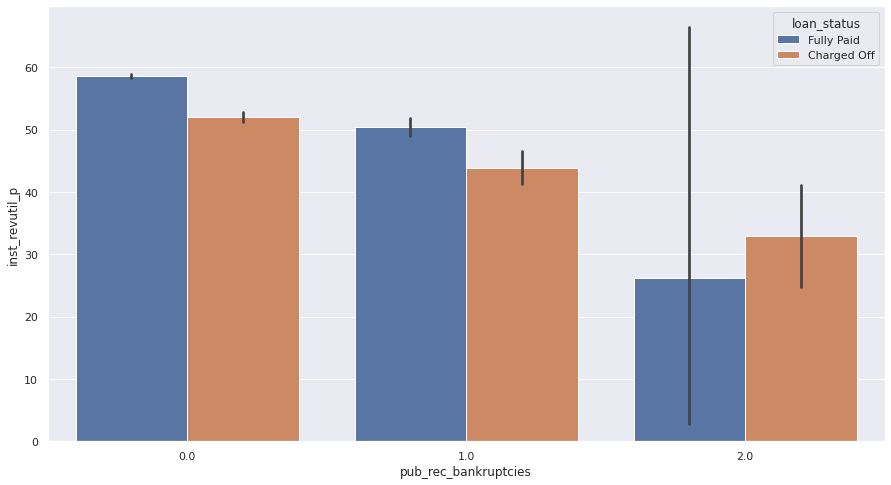

In [550]:
# Plotting with revolving utility rate

plt.figure(figsize = (15,8))
sns.barplot(x = 'pub_rec_bankruptcies',y = 'inst_revutil_p', hue = 'loan_status',data = df_revutil)

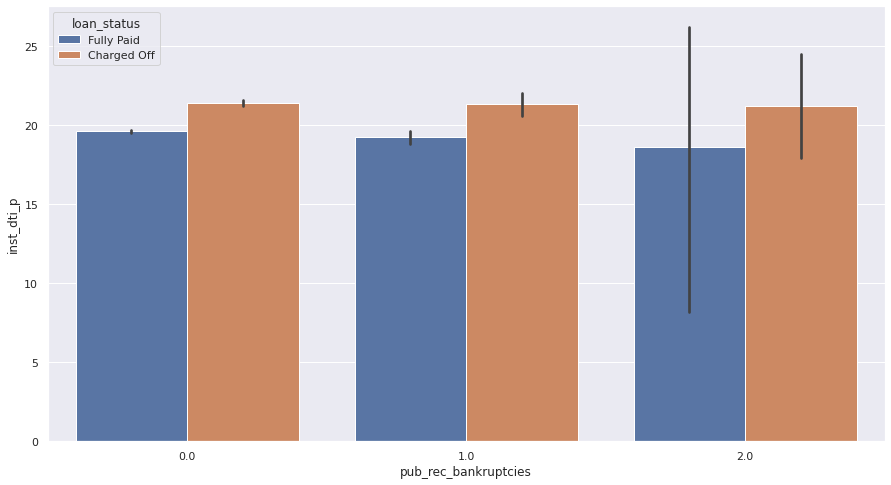

In [551]:
# Plot for dti with entire dataframe

plt.figure(figsize = (15,8))
sns.barplot(x = 'pub_rec_bankruptcies',y = 'inst_dti_p', hue = 'loan_status',data = df)

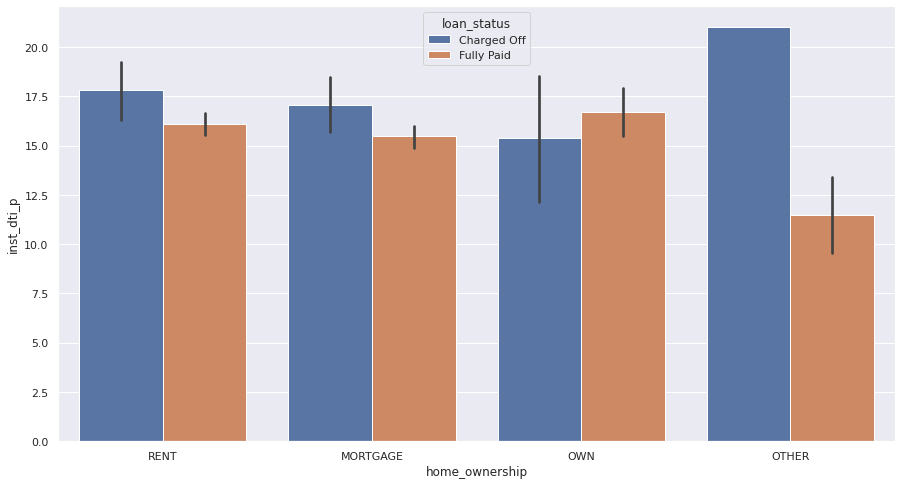

In [552]:
# Plot for home ownership
# Plotting with dti

plt.figure(figsize = (15,8))
sns.barplot(x = 'home_ownership',y = 'inst_dti_p', hue = 'loan_status',data = df_dti)

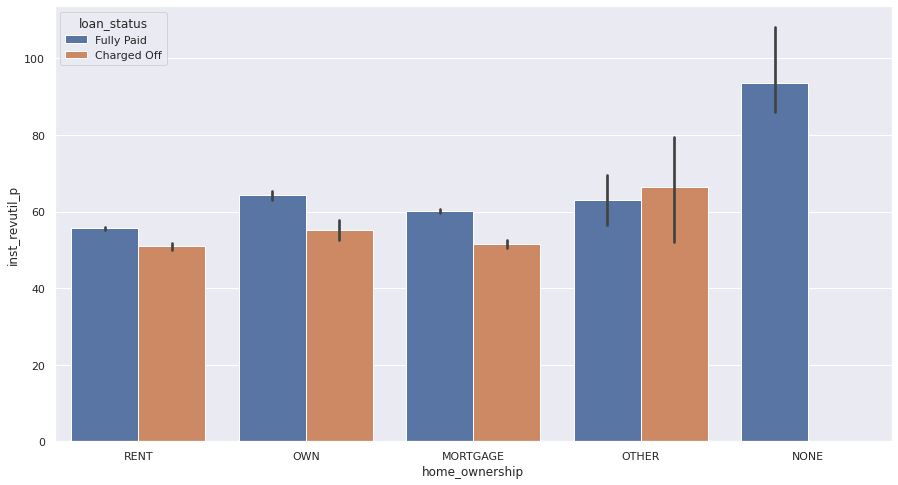

In [554]:
# Plotting with revolving utility rate

plt.figure(figsize = (15,8))
sns.barplot(x = 'home_ownership',y = 'inst_revutil_p', hue = 'loan_status',data = df_revutil)

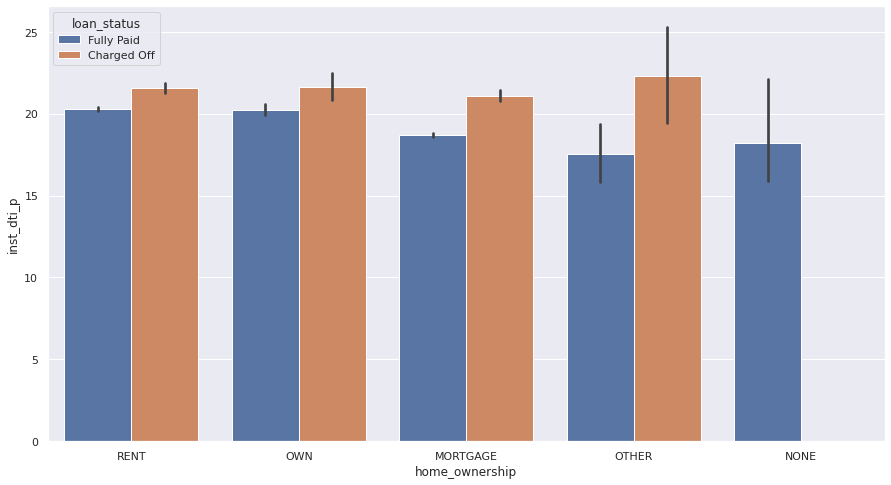

In [553]:
# Plotting with entire data

plt.figure(figsize = (15,8))
sns.barplot(x = 'home_ownership',y = 'inst_dti_p', hue = 'loan_status',data = df)

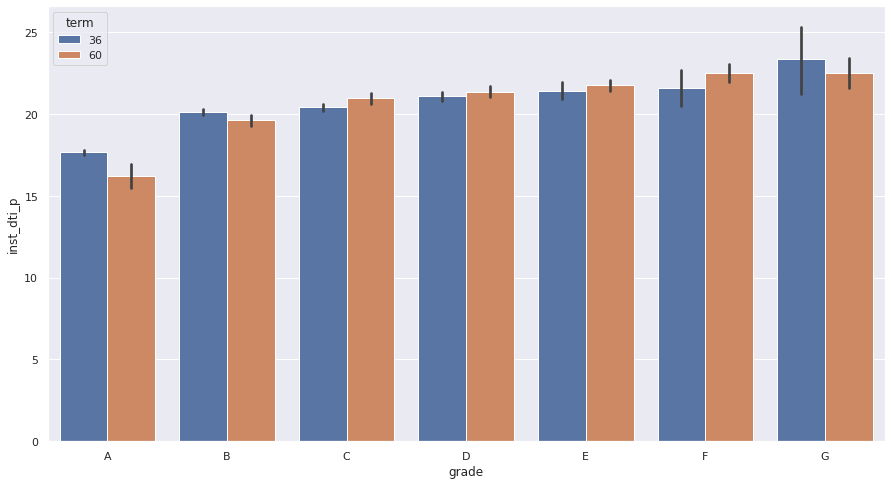

In [565]:
# Plot installment to debt metrics against term and grade

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade', y = 'inst_dti_p', hue = 'term', data = df, order = g_ord)

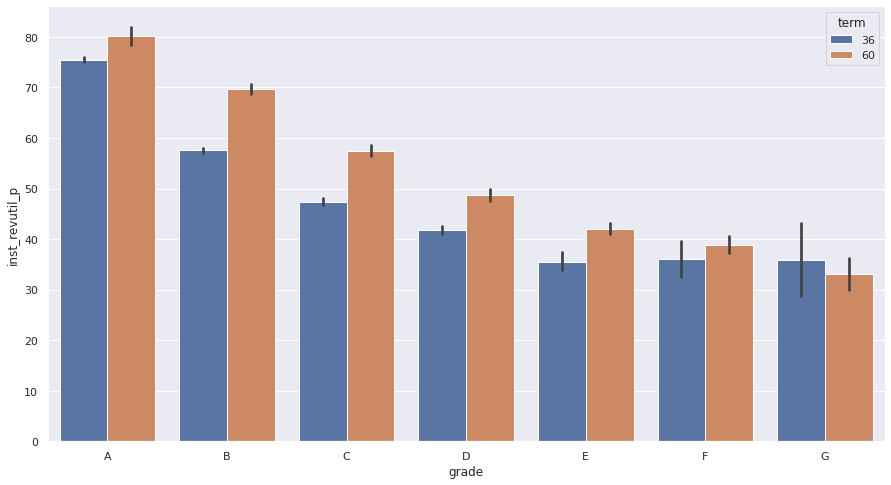

In [563]:
# Ploting with inst_revutil_p

plt.figure(figsize = (15,8))
sns.barplot(x = 'grade', y = 'inst_revutil_p', hue = 'term', data = df, order = g_ord)

##### Observation on installment to debt factors percentages

1. Percentage of instalment to 'debt to income percentage' displayed a pattern that can lead to identify default cases.
2. In cases of grades, employment length and public recorded bankruptcies and home ownership categories, this metric can be used to get threshold value beyond which, loans could default.
3. This metric can be used across the entire loan data with the same behaviour and therefore is a universal metric to classify a loan.
3. The metric, 'inst_dti_p' shows consistent trend across grade for both terms of loan.

In [558]:
# Correlate with interest rate

df[['inst_dti_p','inst_revutil_p','int_rate']].corr()

inst_dti_p  inst_revutil_p  int_rate
inst_dti_p        1.000000       -0.170792  0.179478
inst_revutil_p   -0.170792        1.000000 -0.440100
int_rate          0.179478       -0.440100  1.000000

The correlation of interest rate with the key metrics is low. Therefore, interest rate cannot be used as an indicator for classifying loan as default or otherwise.

#### Metric in Monitoring Stage of Loan
During this stage, the factors taken into account are the outstanding amounts and the last payment date. Since the last payment date can be either before or after the term completion, this information could provide some indication to the loan status. 

In [ ]:
# Investigate Last Payment Date against Issue Date and term

df['term'].unique()

array([36, 60])

In [ ]:
df['last_pymnt_d'].sample()

35766   2012-08-01
Name: last_pymnt_d, dtype: datetime64[ns]

Derive Data Driven metric of Term Ending Date

In [ ]:
# Create the term ending date.

df.loc[df['term']==36, 'term_end_d'] = df['issue_d'] + pd.DateOffset(months = 36)
df.loc[df['term']==60, 'term_end_d'] = df['issue_d'] + pd.DateOffset(months = 60)

In [ ]:
# Get the difference of months between last payment date and issue date

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df.loc[~df['last_pymnt_d'].isna(),'foreclose_pd'] = (df['term_end_d'] - df['last_pymnt_d'])/np.timedelta64(1,'M')
df['foreclose_pd'].describe()

count    38577.000000
mean        13.443551
std         15.240699
min        -52.994928
25%          0.000000
50%          9.035093
75%         23.064129
max         59.073082
Name: foreclose_pd, dtype: float64

In [ ]:
# Check payment delay with indicators

df.groupby(['loan_status', 'grade'])['foreclose_pd'].describe()

count       mean        std        min        25%  \
loan_status grade                                                        
Charged Off A        602.0  18.656117  10.638749 -25.002567  10.973531   
            B       1425.0  23.291969  14.706516 -46.982484  13.010534   
            C       1347.0  25.319969  15.882144 -48.986632  15.014682   
            D       1118.0  27.450344  15.886283 -43.959835  16.033183   
            E        715.0  32.774286  16.157450 -46.982484  21.996345   
            F        319.0  35.125682  15.656049 -52.994928  22.981991   
            G        101.0  36.281226  14.264976  -2.004148  26.021068   
Fully Paid  A       9443.0   8.959012  11.324687 -11.992033   0.000000   
            B      10250.0  10.814908  13.618504 -30.949301   0.000000   
            C       6487.0  11.242514  14.228366 -31.015011   0.000000   
            D       3967.0  12.635664  15.513540 -33.971950   0.000000   
            E       1948.0  18.036927  17.777046  -9.035093   0.000000   
            F        657.0  20.077385  17.877748  -4.041151   2.004148   
            G        198.0  21.494229  17.836973 -13.043389   5.026797   

                         50%        75%        max  
loan_status grade                                   
Charged Off A      19.975770  26.021068  56.970369  
            B      22.998419  32.000657  59.040227  
            C      25.035422  34.004805  59.040227  
            D      26.037496  38.013101  59.007372  
            E      33.019159  46.982484  59.040227  
            F      37.027454  48.986632  59.007372  
            G      40.017249  46.029693  59.007372  
Fully Paid  A       4.008296  17.018830  59.040227  
            B       5.026797  19.055833  59.073082  
            C       5.979589  19.975770  59.040227  
            D       6.965235  22.045627  59.040227  
            E      14.029036  30.949301  59.073082  
            F      17.051685  34.004805  59.073082  
            G      20.008624  36.008953  59.007372

In [ ]:
# Check the metric against loan status and term

df.groupby(['loan_status','term'])['foreclose_pd'].describe()

count       mean        std        min        25%  \
loan_status term                                                        
Charged Off 36     3227.0  18.257409  11.464071 -52.994928  11.055668   
            60     2400.0  36.918321  14.357671 -12.024888  26.021068   
Fully Paid  36    25869.0   8.069651  10.561633 -33.971950   0.000000   
            60     7081.0  22.925782  18.316422  -7.030945   6.045299   

                        50%        75%        max  
loan_status term                                   
Charged Off 36    19.975770  27.006715  35.089016  
            60    39.031602  48.986632  59.040227  
Fully Paid  36     2.956940  15.967474  35.089016  
            60    21.027126  38.013101  59.073082

##### Observation on Foreclosure Period metric

1. The foreclosure period increases in alphabetical order of grade.
2. The foreclosure period is higher for 'Charged Off' category than for 'Fully Paid'.
3. The foreclosure period carries no relevance to the grade and loan status.

#### Metric in Termination Stage
1. Attributes of the termination stage have been investigated durng the cleaning process itself. It is summarised here.

2. The total payment and total recoveries of principal, interest and late fee show equivalence to funded amount in case of fully paid loan. In case of Charged Off loans, these are around 50% of the funded amount. Since these features are post loan closing, they are irrelevant in classifying a loan case.

3. Similarly, the total recoveries and collection_recovery_fee field has relevance only in case of defaulted loan cases.

4. Therefore, recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee and collection_recovery_fee were dropped from the dataframe.

# Summary

1. The data was cleaned and checked for consistencies. As part of Exploratory Data Analysis, different forms of analysis were carried out.

2. Different variables were investigated for its relationships. Effect of attributes with each other were examined. Relevant plots were generated for explaining the same. Data analysis was undertaken using business concept. Necessary metrics aimed at data and business concepts were generated and analysed. These include 
    >a. Length of Credit History
    
    >b. Foreclosure Period

    >c. Ratio of open account to total account

    >d. Instalment to income percentage

    >e. Instalment to debt to income percentage

    >f. Instalment to revolving utility rate percentage

3. Key indicators bearing universal effect on the data were discovered by deriving various metrics. These provided limiting values that can be used to classify loans.


# Conclusion

1.	The loan status is the key indicator of loan and customer attributes and their combinations. 

2.	The loan grade is a key guiding factor that shows the manner in which loan decisions are made.

3. Other categorical variables were used to verify results obtained against loan grade.

4. The key metrics The following are the key metrics that provide various limits to decide grant of loan: 

    >a. Ratio of open account to total account

    >b. Instalment to income percentage

    >c. Instalment to debt to income percentage

5.	In all the above metrics, values against fully paid loan status are the determining level that can be used to decide

6. Other metrics including Length of credit history, foreclosure period and instalment to revolving utility rate percentage had little significance in determining loan quality.
